In [1]:
import numpy as np
import util

# Selected experimental data analysis
**Can be replaced by the code in package**<br>
Following rounds are selected to form a regularized dataset:
- 250 uM: 1, 2, 3
- 50 uM: 10, 11, 12
- 10 uM: 13, 14, 15
- 2 uM: 19, 20, 21

In [18]:
print(util.color.BOLD + util.color.BLUE + \
'Import regularized exp. dataset' + util.color.END)

dirc = '/mnt/storage/projects/ribozyme_predict/data/k_seq/seqRawCount_select3Reps.pkl'

seqTable = util.load_pickle(dirc)

Import regularized exp. dataset
seqRawCount_select3Reps.pkl:
contains sequences in rnd 5 AND selected k-seq samples (3 replicates per concentration), raw count only


## Distribution of different sample configurations

In [352]:
import itertools

def get_encodeList():
    digits = [0, 1, 2, 3]
    doubles = [[i, j] for i in digits for j in digits]
    encodeList = [i + j for i in doubles for j in doubles]
    return encodeList

encodeList = get_encodeList()

In [3]:
def encode_seq(seq):
    return [sum(~np.isnan(seq['kSeqCounts'][i*6:i*6+6])) for i in range(4)]

configTable = {str(encode):0 for encode in encodeList}
for seq in seqTable:
    configTable[str(encode_seq(seq))] += 1

configTableSorted = list(configTable.items())
sort_fn = lambda a: a[1]
configTableSorted.sort(key=sort_fn, reverse=True)

NameError: name 'encodeList' is not defined

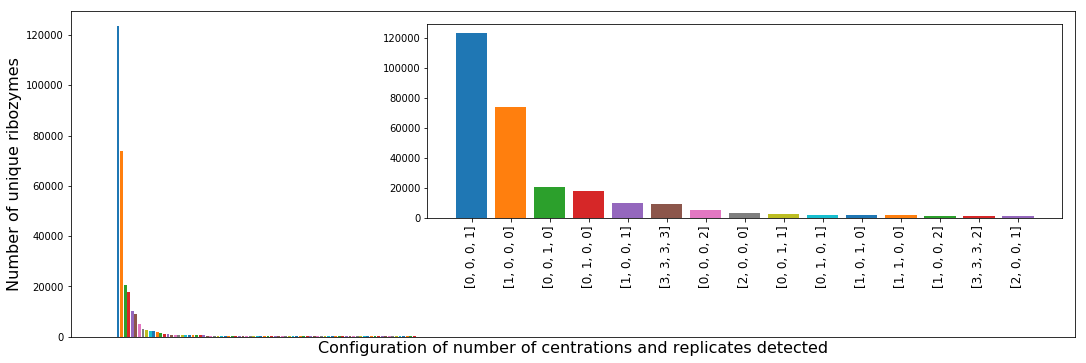

In [97]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[18, 6])
ax = fig.add_subplot(111)

for ix,config in enumerate(configTableSorted):
    ax.bar(ix, config[1], align='center', width=0.8)
ax.set_xticks([])
ax.set_xlabel('Configuration of number of centrations and replicates detected', fontsize=16)
ax.set_ylabel('Number of unique ribozymes', fontsize=16)
    
axInset = fig.add_axes([0.4, 0.4, 0.49, 0.45])
for ix,config in enumerate(configTableSorted[:15]):
    axInset.bar(ix, config[1], align='center', width=0.8)
axInset.set_xticks(np.linspace(0, 14, 15))
axInset.set_xticklabels([config[0] for config in configTableSorted[:15]], fontsize=12, rotation=90)

plt.show()

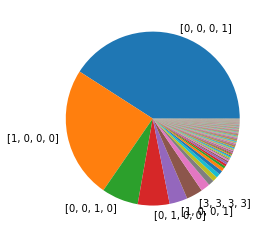

In [108]:
plt.figure()
ax = plt.gca()
ax.pie(x=[config[1] for config in configTableSorted], labels=([config[0] for config in configTableSorted[:6]] + ['' for config in configTableSorted[6:]]))
plt.show()

## Distribution of deviations in each concentration

In [112]:
sampleInfo = util.load_pickle('/mnt/storage/projects/ribozyme_predict/data/k_seq/sampleInfo.pkl')
totCountList = np.array([sample['total'] for sample in sampleInfo])

sampleInfo.pkl:
sample information surveyed on all samples


In [136]:
def std_dev_cal(seq, encode):
    kSeqComp = np.array(seq['kSeqCounts'])/totCountList
    concenStd = [np.nan, np.nan, np.nan, np.nan]
    concenStdPct = [np.nan, np.nan, np.nan, np.nan]
    for concenIx, detectedTime in enumerate(encode):
        if detectedTime >= 2:
            concenStd[concenIx] = np.nanstd(kSeqComp[concenIx*6: concenIx*6+6], ddof=1)
            concenStdPct[concenIx] = np.nanstd(kSeqComp[concenIx*6: concenIx*6+6], ddof=1)/np.nanmean(kSeqComp[concenIx*6: concenIx*6+6])
    return concenStd, concenStdPct


concenStdMtx2 = [[], [], [], []]
concenStdMtx3 = [[], [], [], []]
concenStdMtxPct2 = [[], [], [], []]
concenStdMtxPct3 = [[], [], [], []]

for seq in seqTable:
    encode = encode_seq(seq)
    if (2 in encode) or (3 in encode):
        concenStd, concenStdPct = std_dev_cal(seq, encode)
    for concenIx, detectedTime in enumerate(encode):
        if detectedTime == 2:
            concenStdMtx2[concenIx].append(concenStd[concenIx])
            concenStdMtxPct2[concenIx].append(concenStdPct[concenIx])
        if detectedTime == 3:
            concenStdMtx3[concenIx].append(concenStd[concenIx])
            concenStdMtxPct3[concenIx].append(concenStdPct[concenIx])

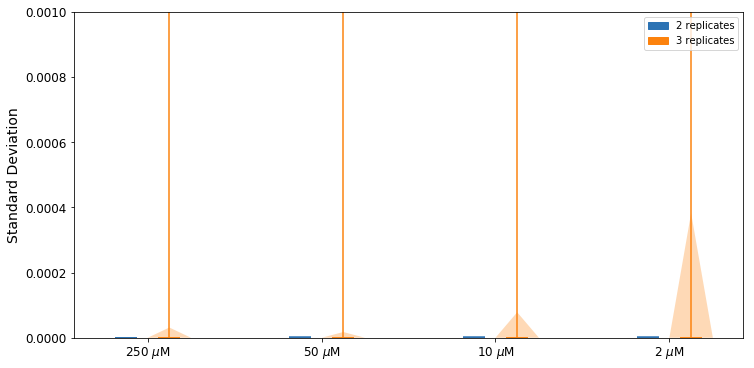

In [142]:
import plot
import matplotlib.patches as mpatches

def set_colors(vp, c):
        for ix, pc in enumerate(vp['bodies']):
            pc.set_facecolor(c)
        vp['cbars'].set_edgecolor(c)
        vp['cmins'].set_edgecolor(c)
        vp['cmaxes'].set_edgecolor(c)
        vp['cmedians'].set_edgecolor(c)

fig = plt.figure(figsize=[12,6])
ax = fig.add_subplot(111)

vp1 = ax.violinplot(dataset=concenStdMtx2, positions=[0.25, 2.25, 4.25, 6.25], showmedians=True)
set_colors(vp1, '#2C73B4')
vp2 = ax.violinplot(dataset=concenStdMtx3, positions=[0.75, 2.75, 4.75, 6.75], showmedians=True)
set_colors(vp2, '#FC820D')

plot.set_ticks_size(ax)
ax.set_ylabel('Standard Deviation', fontsize=14)
ax.set_xticks([0.5, 2.5, 4.5, 6.5])
ax.set_xticklabels([r'250 $\mu$M', r'50 $\mu$M', r'10 $\mu$M', r'2 $\mu$M'], fontsize=12)
ax.set_ylim([0, 0.001])


handle = [mpatches.Patch(color='#2C73B4', label='2 replicates'), mpatches.Patch(color='#FC820D', label='3 replicates')]
ax.legend(handles = handle)

plt.show()

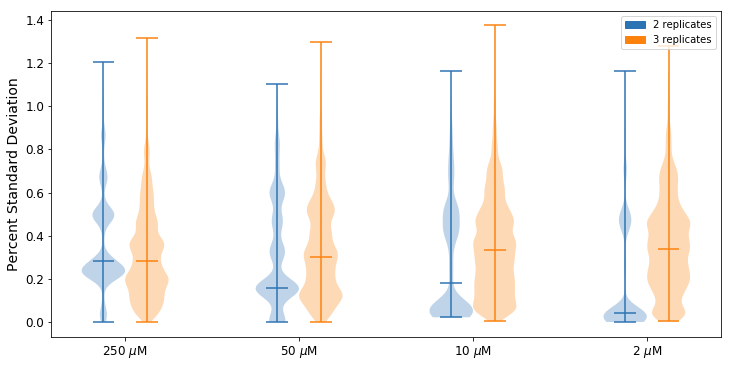

In [138]:
import plot
import matplotlib.patches as mpatches

def set_colors(vp, c):
        for ix, pc in enumerate(vp['bodies']):
            pc.set_facecolor(c)
        vp['cbars'].set_edgecolor(c)
        vp['cmins'].set_edgecolor(c)
        vp['cmaxes'].set_edgecolor(c)
        vp['cmedians'].set_edgecolor(c)

fig = plt.figure(figsize=[12,6])
ax = fig.add_subplot(111)

vp1 = ax.violinplot(dataset=concenStdMtxPct2, positions=[0.25, 2.25, 4.25, 6.25], showmedians=True)
set_colors(vp1, '#2C73B4')
vp2 = ax.violinplot(dataset=concenStdMtxPct3, positions=[0.75, 2.75, 4.75, 6.75], showmedians=True)
set_colors(vp2, '#FC820D')

plot.set_ticks_size(ax)
ax.set_ylabel('Percent Standard Deviation', fontsize=14)
ax.set_xticks([0.5, 2.5, 4.5, 6.5])
ax.set_xticklabels([r'250 $\mu$M', r'50 $\mu$M', r'10 $\mu$M', r'2 $\mu$M'], fontsize=12)

handle = [mpatches.Patch(color='#2C73B4', label='2 replicates'), mpatches.Patch(color='#FC820D', label='3 replicates')]
ax.legend(handles = handle)

plt.show()

# Evaluation for simulated data

## Dataset simulation
Simulate data for
- Detected times
  - 3333
  - 1 time in a concentration (Wait...how to estimate deviation?)
- Error rate
  - Percent standard deviation range from 0 to 0.8, roughly evenly distributed?
- kA range
  - kA in range of 1 to 100, roughly log-normla distribution <br>
    let log10(kA) to be N(0.8, 0.4)
  - A can be from 0.00 to 1.00, evenly distributed

In [67]:
def single_data_simu(config):
    import random
    
    def func(x, A, k):
        return A * (1-np.exp(-0.479 * 90 * k * x))
    
    def yRow_generator(ix, rep):
        yRow = np.concatenate((np.random.normal(loc=sample['y'][ix], scale=sample['y'][ix]*sample['err'], size=rep), [np.nan for i in range(3-rep)]), axis=None)
        np.random.shuffle(yRow)
        return yRow

    sample = {}
    sample['x'] = np.array([0.00025, 0.00005, 0.00001, 0.000002])
    sample['kA'] = 10**np.random.normal(loc=0.8, scale=0.4, size=1)
    sample['A'] = np.random.random()
    sample['k'] = sample['kA']/sample['A']
    sample['y'] = func(sample['x'], sample['A'], sample['k'])
    sample['err'] = np.random.random()*0.8
    sample['data'] = np.array([yRow_generator(ix, rep) for ix,rep in enumerate(config)]).T
    try:
        sample['data'][sample['data'] < 0] = np.nan
    except:
        print(sample)
    sample['config'] = np.sum(~np.isnan(sample['data']), axis=0)
    return sample

### Dataset 1: dense data

In [350]:
simuSet = [single_data_simu([3,3,3,3]) for i in range(10000)]
util.dump_pickle(data=simuSet, dirc='/mnt/storage/projects/ribozyme_predict/data/k_seq/fit_simu/simuSet_1.pkl',
log='10000 simulated data on [3,3,3,3]', overwrite=True)

Data has been saved to /mnt/storage/projects/ribozyme_predict/data/k_seq/fit_simu/simuSet_1.pkl


simuSet_1.pkl:
10000 simulated data on [3,3,3,3]


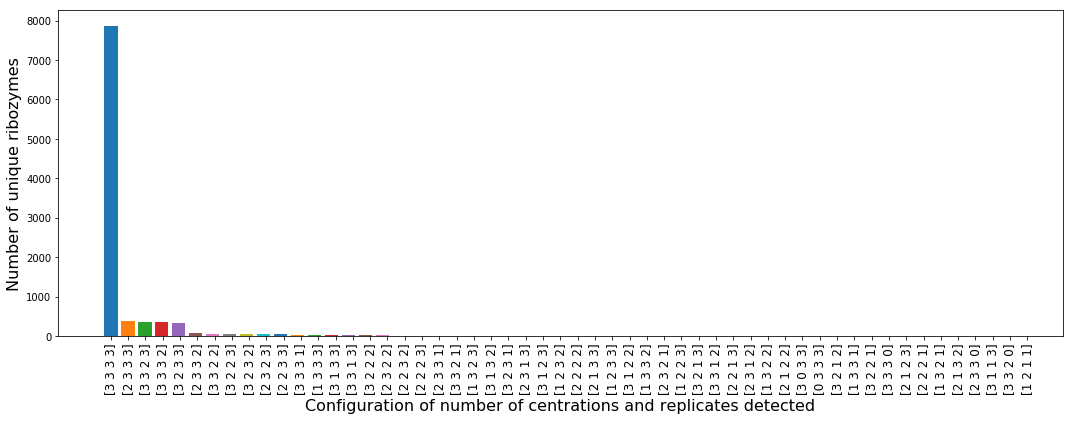

In [384]:
simuSet = util.load_pickle('/mnt/storage/projects/ribozyme_predict/data/k_seq/fit_simu/simuSet_1.pkl')
configList = {}
for seq in simuSet:
    if str(seq['config']) not in configList.keys():
        configList[str(seq['config'])] = 1
    else:
        configList[str(seq['config'])] += 1
sort_fn = lambda x:x[1]
configList = list(configList.items())
configList.sort(key=sort_fn, reverse=True)

import matplotlib.pyplot as plt

fig = plt.figure(figsize=[18, 6])
ax = fig.add_subplot(111)

for ix,config in enumerate(configList):
    ax.bar(ix, config[1], align='center', width=0.8)
ax.set_xticks([])
ax.set_xlabel('Configuration of number of centrations and replicates detected', fontsize=16)
ax.set_ylabel('Number of unique ribozymes', fontsize=16)
ax.set_xticks(np.linspace(0, len(configList), len(configList)))
ax.set_xticklabels([config[0] for config in configList], fontsize=12, rotation=90)

plt.show()

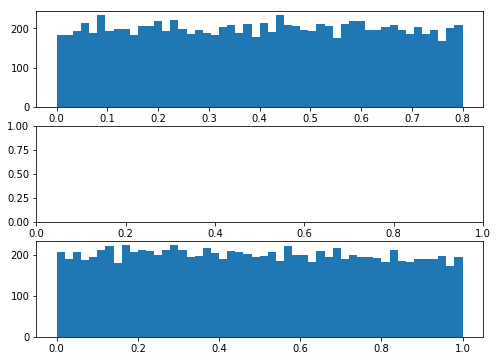

In [407]:
fig, ax = plt.subplots(3,1, figsize=[8,6])
ax[0].hist([sample['err'] for sample in simuSet], bins=50)
kAList = np.log10([sample['kA'] for sample in simuSet])
# ax[1].hist(kAList, bins=50)
ax[2].hist([sample['A'] for sample in simuSet], bins=50)
plt.show()

### Dataset 2: sparse data

In [69]:
def config_simu(numDectected):
    concentrations = [1 for i in range(numDectected)] + [0 for i in range(12-numDectected)]
    np.random.shuffle(concentrations)
    concentrations = np.reshape(concentrations, newshape=[3, 4])
    return np.sum(concentrations, axis=0)

simuSet = [single_data_simu(config_simu(4)) for i in range(2000)]
simuSet += [single_data_simu(config_simu(3)) for i in range(3000)]
simuSet += [single_data_simu(config_simu(2)) for i in range(5000)]

util.dump_pickle(data=simuSet, dirc='/mnt/storage/projects/ribozyme_predict/data/k_seq/fit_simu/simuSet_2_full.pkl',
log='10000 simulated data from random configs with set detection times, 2000 detected 4 times, 3000 detected 3 times, 5000 detected 2 times', overwrite=False)

/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in less


Data has been saved to /mnt/storage/projects/ribozyme_predict/data/k_seq/fit_simu/simuSet_2_full.pkl


### Dataset 3: data with different detected times

In [223]:
def config_simu(numDetected):
    concentrations = [1 for i in range(numDetected)] + [0 for i in range(12-numDetected)]
    np.random.shuffle(concentrations)
    concentrations = np.reshape(concentrations, newshape=[3, 4])
    return np.sum(concentrations, axis=0)

numDetectedList = [2, 4, 6, 8, 10]
simuSet = []
for numDetected in numDetectedList:
    simuSet += [single_data_simu(config_simu(numDetected)) for i in range(2000)]
    
util.dump_pickle(data=simuSet, dirc='/mnt/storage/projects/ribozyme_predict/data/k_seq/fit_simu/simuSet_3_full.pkl',
log='10000 simulated data from random configs with set detection times, 2, 4, 6, 8, 10. 2000 data point each', overwrite=False)

/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in less


Data has been saved to /mnt/storage/projects/ribozyme_predict/data/k_seq/fit_simu/simuSet_3_full.pkl


## Results on Dataset 1(Dense samples)
### Method 1

In [99]:
# import k_seq.confidence_estimation
import util
import numpy as np

def check_estimatable(sample):
    if str(list(sample['config'])) == str([0, 0, 0, 0]):
        return 0
    elif np.isnan(sample['estStd'][2]) or np.isinf(sample['estStd'][2]):
        return 0
    else:
        return 1
        
def results_survey(simuSet):

    estimatable_pct = sum([check_estimatable(sample) for sample in simuSet])/ len(simuSet)
    results = [[sample['err'],
                sample['estStd'][2]/sample['estVar'][2], 
                int(sample['estVar'][2] - 2 * sample['estStd'][2] < sample['kA'] < sample['estVar'][2] + 2 * sample['estStd'][2])]
                for sample in simuSet if check_estimatable(sample)==1]
    return estimatable_pct, results 

simuSet = util.load_pickle('/mnt/storage/projects/k-seq/working/archive/fit_simu/simuSet_1_method_1_res.pkl')
pctSuccess, results = results_survey(simuSet)

simuSet_1_method_1_res.pkl:
10000 simulated data on [3,3,3,3] using method 1: simply from pcov in curve_fit


/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


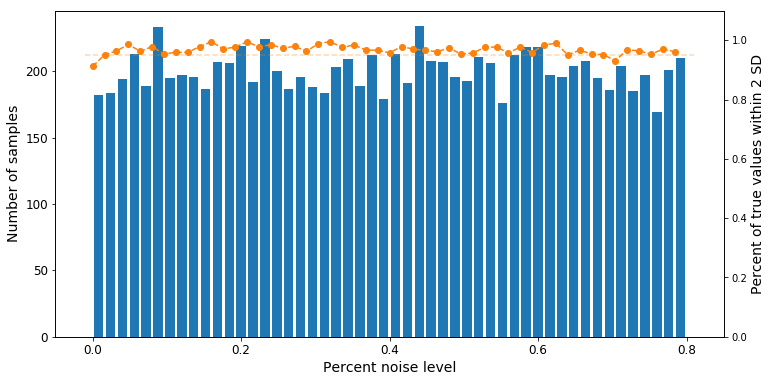

In [94]:
import matplotlib.pyplot as plt
import plot
import matplotlib.patches as mpatches
import numpy as np

def binning(results, ix, bins):
    pctCounter = [[] for i in range(len(bins)+1)]
    bins = list(bins) + [np.inf]
    for res in results:
        k = 0
        while res[ix] > bins[k]:
            k += 1
        pctCounter[k].append(res[-1])
    return [np.mean(i) for i in pctCounter]

lowest = 0
highest = 0.8

fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(111)
bins = np.linspace(lowest, highest, 51)
ax1.hist([res[0] for res in results], bins=bins, rwidth=0.8)

ax2 = ax1.twinx()
pct = binning(results, 0, bins)
ax2.plot([bins[0]*bins[0]/bins[1]] + list(bins[:-1]) + [bins[-1]*bins[-1]/bins[-2]], pct, 'o--', color='#FC820D')
ax2.set_ylim([0, 1.1])
ax2.plot([-0.01, 0.81], [0.95, 0.95], color='#FC820D', ls='--', alpha=0.3)

plot.set_ticks_size(ax1)
plot.set_ticks_size(ax2)
ax1.set_ylabel('Number of samples', fontsize=14)
ax1.set_xlabel('Percent noise level', fontsize=14)
ax2.set_ylabel('Percent of true values within 2 SD', fontsize=14)


fig.savefig('/mnt/chen-nas/Users/Yuning/figures/simuSet_1_method_1_1.png', dpi=300)
plt.show()

/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


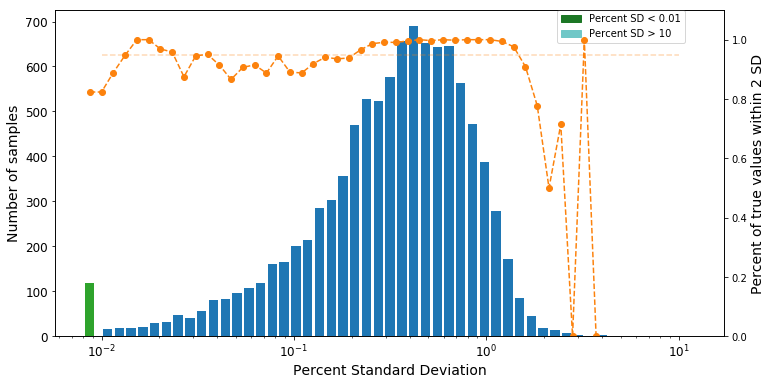

In [103]:
import matplotlib.patches as mpatches

lowest = 0.01
highest = 10

fig = plt.figure(figsize=[12,6])
## Plot histogram
ax1 = fig.add_subplot(111)
bins = np.logspace(np.log10(lowest), np.log10(highest), 50)
ax1.hist([res[1] for res in results], bins=bins, rwidth=0.8)
ax1.set_xscale('log')
## Add two extra bins
ax1.bar([bins[0]*bins[0]/bins[1]], [sum([1 for res in results if res[1] < lowest])], width=(bins[1]-bins[0])*0.6, color='#2EA32C')
ax1.bar([bins[-1]*bins[-1]/bins[-2]], [sum([1 for res in results if res[1] > highest])], width=(bins[-1]/bins[-2])*0.9, color='#70C7C7')

ax2 = ax1.twinx()
pct = binning(results, 1, bins)
ax2.plot([bins[0]*bins[0]/bins[1]] + list(bins[:-1]) + [bins[-1]*bins[-1]/bins[-2]], pct, 'o--', color='#FC820D')
ax2.set_ylim([0, 1.1])
ax2.plot([0.01, 10], [0.95, 0.95], color='#FC820D', ls='--', alpha=0.3)

plot.set_ticks_size(ax1)
plot.set_ticks_size(ax2)
ax1.set_ylabel('Number of samples', fontsize=14)
ax1.set_xlabel('Percent Standard Deviation', fontsize=14)
ax2.set_ylabel('Percent of true values within 2 SD', fontsize=14)

handle = [mpatches.Patch(color='#1C7725', label='Percent SD < 0.01'),
          mpatches.Patch(color='#70C7C7', label='Percent SD > 10')]
ax1.legend(handles=handle, loc=[0.75, 0.9])


fig.savefig('/mnt/chen-nas/Users/Yuning/figures/simuSet_1_method_1.png', dpi=300)
plt.show()

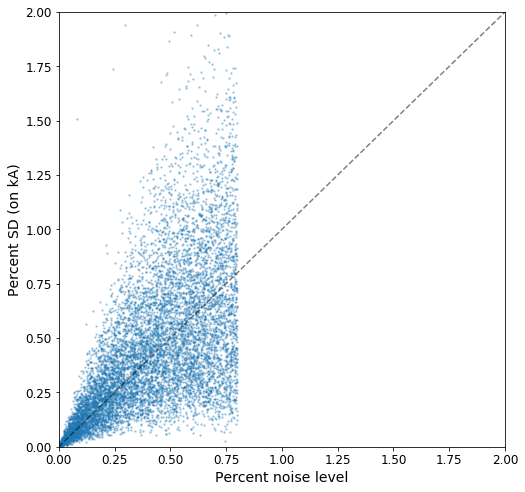

In [104]:
fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(111)
ax.scatter([sample['err'] for sample in simuSet], [sample['estStd'][2]/sample['estVar'][2] for sample in simuSet], s=2, alpha=0.3)
plot.set_ticks_size(ax)
ax.set_ylim([0, 2])
ax.set_xlim([0, 2])
ax.plot([0, 2], [0, 2], 'k--', alpha=0.5)
ax.set_xlabel('Percent noise level', fontsize=14)
ax.set_ylabel('Percent SD (on kA)', fontsize=14)
fig.savefig('/mnt/chen-nas/Users/Yuning/figures/simuSet_1_method_1_2.png', dpi=300)
plt.show()

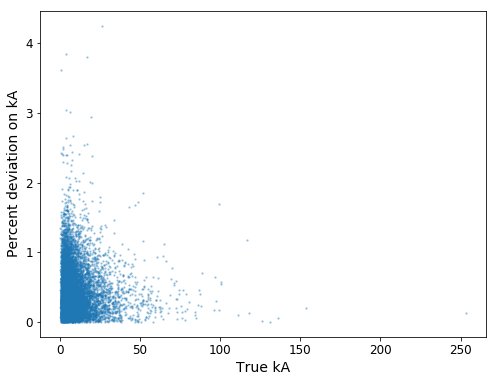

In [86]:
fig = plt.figure(figsize=[8,6])
ax = fig.add_subplot(111)
ax.scatter([sample['kA'] for sample in simuSet], [sample['estStd'][2]/sample['estVar'][2] for sample in simuSet], s=2, alpha=0.3)
plot.set_ticks_size(ax)
# ax.set_ylim([0, 2])
ax.set_xlabel('True kA', fontsize=14)
ax.set_ylabel('Percent deviation on kA', fontsize=14)
plt.show()

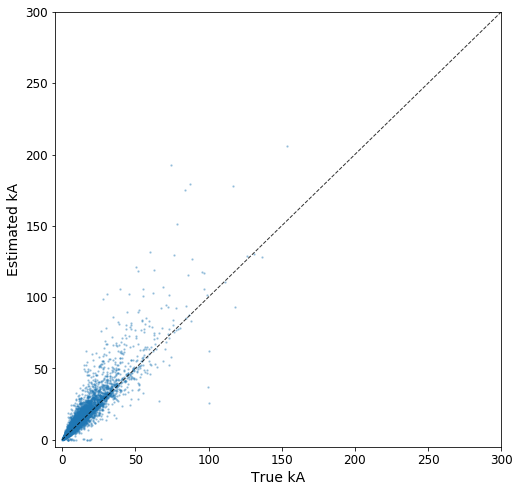

In [89]:
fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(111)
ax.scatter([sample['kA'] for sample in simuSet], [sample['estVar'][2] for sample in simuSet], s=2, alpha=0.3)
ax.plot([0, 300], [0, 300], 'k--', alpha=0.8, lw=1)
plot.set_ticks_size(ax)
ax.set_ylim([-5, 300])
ax.set_xlim([-5, 300])
ax.set_xlabel('True kA', fontsize=14)
ax.set_ylabel('Estimated kA', fontsize=14)
plt.show()

In [416]:
util.dump_pickle(data=simuSet, dirc='/mnt/storage/projects/ribozyme_predict/data/k_seq/fit_simu/simuSet_1_method_1_res.pkl',
log='10000 simulated data on [3,3,3,3] using method 1: simply from pcov in curve_fit', overwrite=True)

Data has been saved to /mnt/storage/projects/ribozyme_predict/data/k_seq/fit_simu/simuSet_1_method_1_res.pkl


### Method 2

In [ ]:
simuSet = util.load_pickle()
for sample in simuSet:
    var, std = method_2(sample)
    sample['estVar'] = var
    sample['estStd'] = std

results = [[sample['estStd'][2]/sample['estVar'][2], int(sample['estStd'][2] - 2* sample['estVar'][2] < sample['kA'] < sample['estStd'][2] + 2* sample['estVar'][2])] for sample in simuSet]

In [109]:
def results_survey(simuSet):
    def check(sample):
        if str(list(sample['config'])) == str([0, 0, 0, 0]):
            return 0
        elif np.isnan(sample['estStd'][2]) or np.isinf(sample['estStd'][2]):
            return 0
        else:
            return 1

    pctSuccess = sum([check(sample) for sample in simuSet])/ len(simuSet)
    results = [[sample['err'],
                sample['estStd'][2] / sample['estVar'][2],
                int(sample['estVar'][2] - 2 * sample['estStd'][2] < sample['kA'] < sample['estVar'][2] + 2 * sample['estStd'][2])]
                for sample in simuSet if check(sample)==1]
    return pctSuccess, results

simuSet = util.load_pickle('/mnt/storage/projects/k-seq/working/archive/fit_simu/simuSet_1_method_2_res.pkl')

pctSuccess, results = results_survey(simuSet)

simuSet_1_method_2_res.pkl:
10000 simulated data on [3,3,3,3] using method 2: calculated from 3 manually selected series


/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


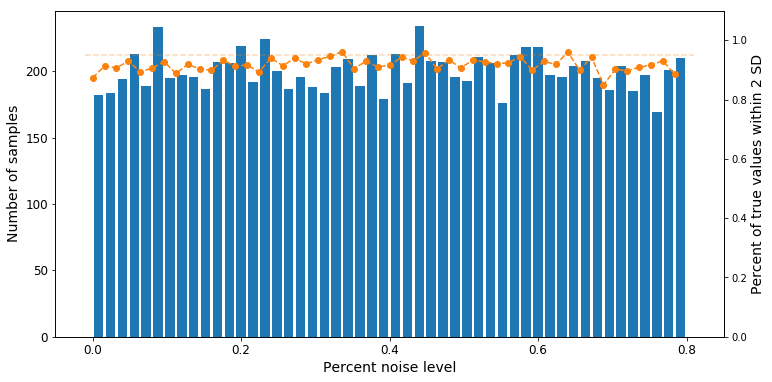

In [112]:
import matplotlib.pyplot as plt
import plot
import matplotlib.patches as mpatches
import numpy as np

def binning(results, ix, bins):
    pctCounter = [[] for i in range(len(bins)+1)]
    bins = list(bins) + [np.inf]
    for res in results:
        k = 0
        while res[ix] > bins[k]:
            k += 1
        pctCounter[k].append(res[-1])
    return [np.mean(i) for i in pctCounter]

lowest = 0
highest = 0.8

fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(111)
bins = np.linspace(lowest, highest, 51)
ax1.hist([res[0] for res in results], bins=bins, rwidth=0.8)

ax2 = ax1.twinx()
pct = binning(results, 0, bins)
ax2.plot([bins[0]*bins[0]/bins[1]] + list(bins[:-1]) + [bins[-1]*bins[-1]/bins[-2]], pct, 'o--', color='#FC820D')
ax2.set_ylim([0, 1.1])
ax2.plot([-0.01, 0.81], [0.95, 0.95], color='#FC820D', ls='--', alpha=0.3)

plot.set_ticks_size(ax1)
plot.set_ticks_size(ax2)
ax1.set_ylabel('Number of samples', fontsize=14)
ax1.set_xlabel('Percent noise level', fontsize=14)
ax2.set_ylabel('Percent of true values within 2 SD', fontsize=14)


fig.savefig('/mnt/chen-nas/Users/Yuning/figures/simuSet_1_method_2_1.png', dpi=300)
plt.show()

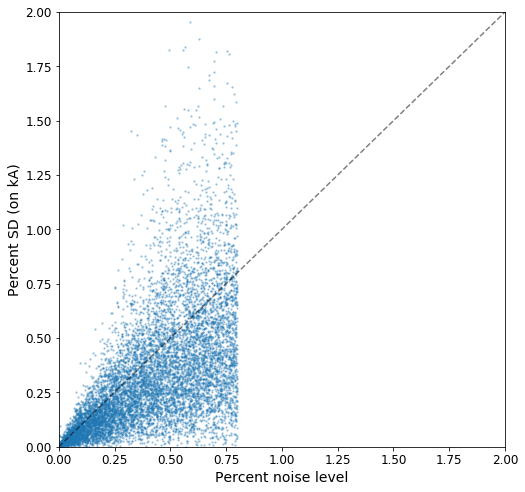

In [113]:
fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(111)
ax.scatter([sample['err'] for sample in simuSet], [sample['estStd'][2]/sample['estVar'][2] for sample in simuSet], s=2, alpha=0.3)
plot.set_ticks_size(ax)
ax.set_ylim([0, 2])
ax.set_xlim([0, 2])
ax.plot([0, 2], [0, 2], 'k--', alpha=0.5)
ax.set_xlabel('Percent noise level', fontsize=14)
ax.set_ylabel('Percent SD (on kA)', fontsize=14)
fig.savefig('/mnt/chen-nas/Users/Yuning/figures/simuSet_1_method_2_2.png', dpi=300)
plt.show()

/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


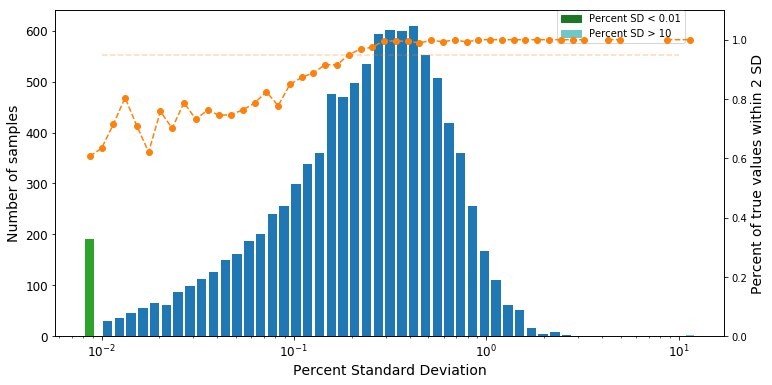

In [115]:
import matplotlib.patches as mpatches

lowest = 0.01
highest = 10

fig = plt.figure(figsize=[12,6])
## Plot histogram
ax1 = fig.add_subplot(111)
bins = np.logspace(np.log10(lowest), np.log10(highest), 50)
ax1.hist([res[1] for res in results], bins=bins, rwidth=0.8)
ax1.set_xscale('log')
## Add two extra bins
ax1.bar([bins[0]*bins[0]/bins[1]], [sum([1 for res in results if res[1] < lowest])], width=(bins[1]-bins[0])*0.6, color='#2EA32C')
ax1.bar([bins[-1]*bins[-1]/bins[-2]], [sum([1 for res in results if res[1] > highest])], width=(bins[-1]/bins[-2])*0.9, color='#70C7C7')

ax2 = ax1.twinx()
pct = binning(results, 1, bins)
ax2.plot([bins[0]*bins[0]/bins[1]] + list(bins[:-1]) + [bins[-1]*bins[-1]/bins[-2]], pct, 'o--', color='#FC820D')
ax2.set_ylim([0, 1.1])
ax2.plot([0.01, 10], [0.95, 0.95], color='#FC820D', ls='--', alpha=0.3)

plot.set_ticks_size(ax1)
plot.set_ticks_size(ax2)
ax1.set_ylabel('Number of samples', fontsize=14)
ax1.set_xlabel('Percent Standard Deviation', fontsize=14)
ax2.set_ylabel('Percent of true values within 2 SD', fontsize=14)

handle = [mpatches.Patch(color='#1C7725', label='Percent SD < 0.01'),
          mpatches.Patch(color='#70C7C7', label='Percent SD > 10')]
ax1.legend(handles=handle, loc=[0.75, 0.9])


fig.savefig('/mnt/chen-nas/Users/Yuning/figures/simuSet_1_method_2.png', dpi=300)
plt.show()

In [528]:
util.dump_pickle(data=simuSet, dirc='/mnt/storage/projects/ribozyme_predict/data/k_seq/fit_simu/simuSet_1_method_2_res.pkl', log='10000 simulated data on [3,3,3,3] using method 2: calculated from 3 manually selected series', overwrite=True)

Data has been saved to /mnt/storage/projects/ribozyme_predict/data/k_seq/fit_simu/simuSet_1_method_2_res.pkl


#### SD calculation convergence test

In [3]:
import numpy as np
import matplotlib.pyplot as plt

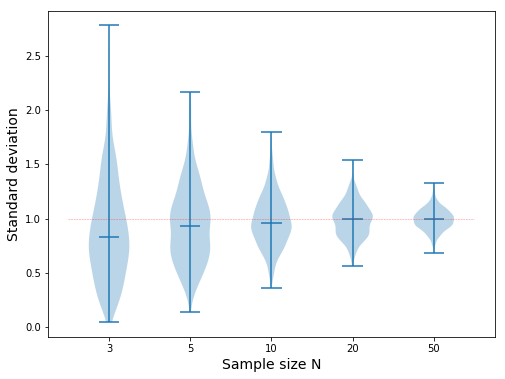

In [65]:
sd_list = [[np.std(np.random.normal(size=N, scale=1), ddof=1) for _ in range(1000)] for N in [3, 5, 10, 20, 50]]
fig = plt.figure(figsize=[8, 6])
ax = fig.add_subplot(111)
ax.violinplot(positions=[1, 2, 3, 4, 5],
               dataset=sd_list,
               showmedians=True)
ax.plot([0.5, 5.5], [1,1], 'r--', lw=0.5, alpha=0.5)
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([3, 5, 10, 20, 50])
ax.set_xlabel('Sample size N', fontsize=14)
ax.set_ylabel('Standard deviation', fontsize=14)
fig.savefig('/mnt/chen-nas/Users/Yuning/figures/sd_est_illustration.jpeg', dpi=300)
plt.show()

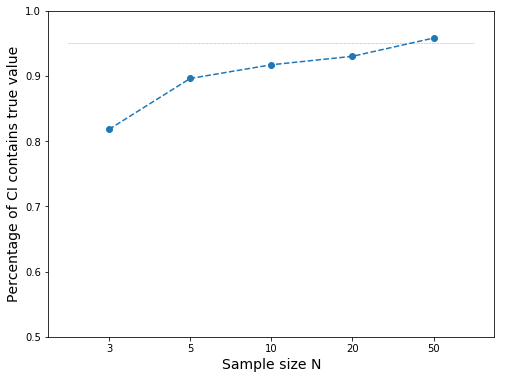

In [66]:
def true_val_in_range(val_list, true_val):
    return np.mean(val_list) - 2*np.std(val_list, ddof=1)/np.sqrt(len(val_list)) < true_val < np.mean(val_list) + 2*np.std(val_list, ddof=1)/np.sqrt(len(val_list))

sd_list = [[true_val_in_range(np.random.normal(scale=1, size=N), 0) for _ in range(1000)] for N in [3, 5, 10, 20, 50]]
fig = plt.figure(figsize=[8, 6])
ax = fig.add_subplot(111)
ax.plot([1, 2, 3, 4, 5], np.mean(sd_list, axis=1), 'o--')
ax.plot([0.5, 5.5], [0.95, 0.95], 'r--', lw=0.5, alpha=0.5)
ax.set_ylim([0.5, 1])
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([3, 5, 10, 20, 50])
ax.set_xlabel('Sample size N', fontsize=14)
ax.set_ylabel('Percentage of CI contains true value', fontsize=14)
fig.savefig('/mnt/chen-nas/Users/Yuning/figures/sd_est_illustration_ci.jpeg', dpi=300)
plt.show()

### Method 3

In [ ]:
simuSet = util.load_pickle('/mnt/storage/projects/ribozyme_predict/data/k_seq/fit_simu/simuSet_1.pkl')
for sample in simuSet:
    var, std = method_3(sample)
    sample['estVar'] = var
    sample['estStd'] = std

In [147]:
simuSet = util.load_pickle('/mnt/storage/projects/ribozyme_predict/data/k_seq/fit_simu/simuSet_1_method_3_res.pkl')

pctSuccess, results = k_seq.confidence_estimation.results_survey(simuSet)

simuSet_1_method_3_res.pkl:
10000 simulated data on [3,3,3,3] using method 3: calculated from 3 randomly selected series


simuSet_1_method_3_res.pkl:
10000 simulated data on [3,3,3,3] using method 3: calculated from 3 randomly selected series


/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


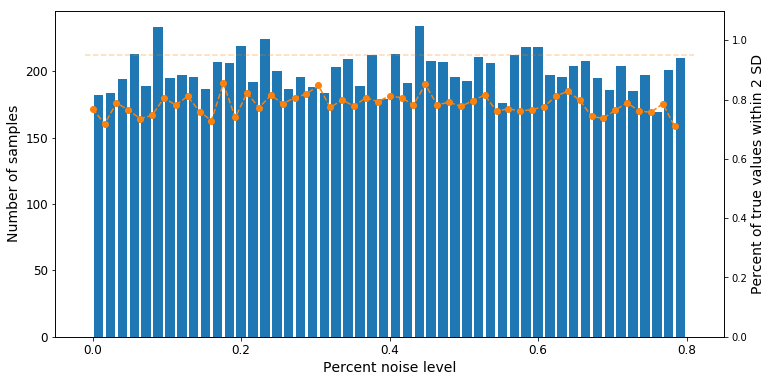

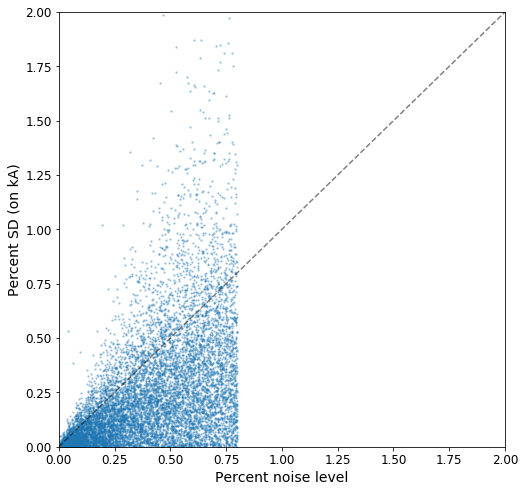

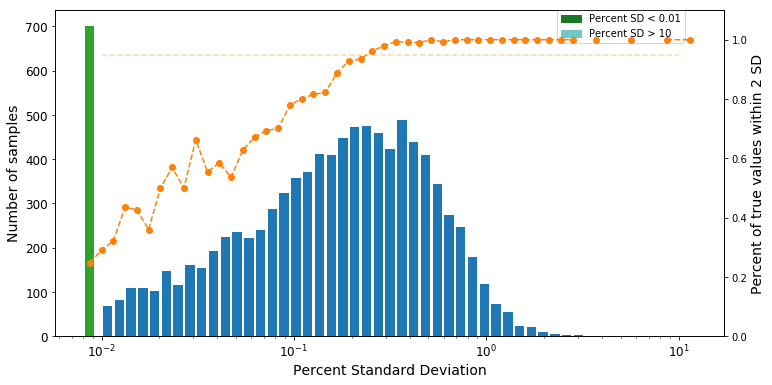

In [116]:
mtd = 3

import matplotlib.pyplot as plt
import plot
import matplotlib.patches as mpatches
import numpy as np

def results_survey(simuSet):
    def check(sample):
        if str(list(sample['config'])) == str([0, 0, 0, 0]):
            return 0
        elif np.isnan(sample['estStd'][2]) or np.isinf(sample['estStd'][2]):
            return 0
        else:
            return 1

    pctSuccess = sum([check(sample) for sample in simuSet])/ len(simuSet)
    results = [[sample['err'],
                sample['estStd'][2] / sample['estVar'][2],
                int(sample['estVar'][2] - 2 * sample['estStd'][2] < sample['kA'] < sample['estVar'][2] + 2 * sample['estStd'][2])]
                for sample in simuSet if check(sample)==1]
    return pctSuccess, results

simuSet = util.load_pickle('/mnt/storage/projects/k-seq/working/archive/fit_simu/simuSet_1_method_{}_res.pkl'.format(mtd))
pctSuccess, results = results_survey(simuSet)


def binning(results, ix, bins):
    pctCounter = [[] for i in range(len(bins)+1)]
    bins = list(bins) + [np.inf]
    for res in results:
        k = 0
        while res[ix] > bins[k]:
            k += 1
        pctCounter[k].append(res[-1])
    return [np.mean(i) for i in pctCounter]

lowest = 0
highest = 0.8

fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(111)
bins = np.linspace(lowest, highest, 51)
ax1.hist([res[0] for res in results], bins=bins, rwidth=0.8)

ax2 = ax1.twinx()
pct = binning(results, 0, bins)
ax2.plot([bins[0]*bins[0]/bins[1]] + list(bins[:-1]) + [bins[-1]*bins[-1]/bins[-2]], pct, 'o--', color='#FC820D')
ax2.set_ylim([0, 1.1])
ax2.plot([-0.01, 0.81], [0.95, 0.95], color='#FC820D', ls='--', alpha=0.3)

plot.set_ticks_size(ax1)
plot.set_ticks_size(ax2)
ax1.set_ylabel('Number of samples', fontsize=14)
ax1.set_xlabel('Percent noise level', fontsize=14)
ax2.set_ylabel('Percent of true values within 2 SD', fontsize=14)


fig.savefig('/mnt/chen-nas/Users/Yuning/figures/simuSet_1_method_{}_1.png'.format(mtd), dpi=300)
plt.show()

fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(111)
ax.scatter([sample['err'] for sample in simuSet], [sample['estStd'][2]/sample['estVar'][2] for sample in simuSet], s=2, alpha=0.3)
plot.set_ticks_size(ax)
ax.set_ylim([0, 2])
ax.set_xlim([0, 2])
ax.plot([0, 2], [0, 2], 'k--', alpha=0.5)
ax.set_xlabel('Percent noise level', fontsize=14)
ax.set_ylabel('Percent SD (on kA)', fontsize=14)
fig.savefig('/mnt/chen-nas/Users/Yuning/figures/simuSet_1_method_{}_2.png'.format(mtd), dpi=300)
plt.show()

lowest = 0.01
highest = 10

fig = plt.figure(figsize=[12,6])
## Plot histogram
ax1 = fig.add_subplot(111)
bins = np.logspace(np.log10(lowest), np.log10(highest), 50)
ax1.hist([res[1] for res in results], bins=bins, rwidth=0.8)
ax1.set_xscale('log')
## Add two extra bins
ax1.bar([bins[0]*bins[0]/bins[1]], [sum([1 for res in results if res[1] < lowest])], width=(bins[1]-bins[0])*0.6, color='#2EA32C')
ax1.bar([bins[-1]*bins[-1]/bins[-2]], [sum([1 for res in results if res[1] > highest])], width=(bins[-1]/bins[-2])*0.9, color='#70C7C7')

ax2 = ax1.twinx()
pct = binning(results, 1, bins)
ax2.plot([bins[0]*bins[0]/bins[1]] + list(bins[:-1]) + [bins[-1]*bins[-1]/bins[-2]], pct, 'o--', color='#FC820D')
ax2.set_ylim([0, 1.1])
ax2.plot([0.01, 10], [0.95, 0.95], color='#FC820D', ls='--', alpha=0.3)

plot.set_ticks_size(ax1)
plot.set_ticks_size(ax2)
ax1.set_ylabel('Number of samples', fontsize=14)
ax1.set_xlabel('Percent Standard Deviation', fontsize=14)
ax2.set_ylabel('Percent of true values within 2 SD', fontsize=14)

handle = [mpatches.Patch(color='#1C7725', label='Percent SD < 0.01'),
          mpatches.Patch(color='#70C7C7', label='Percent SD > 10')]
ax1.legend(handles=handle, loc=[0.75, 0.9])


fig.savefig('/mnt/chen-nas/Users/Yuning/figures/simuSet_1_method_{}.png'.format(mtd), dpi=300)
plt.show()



/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


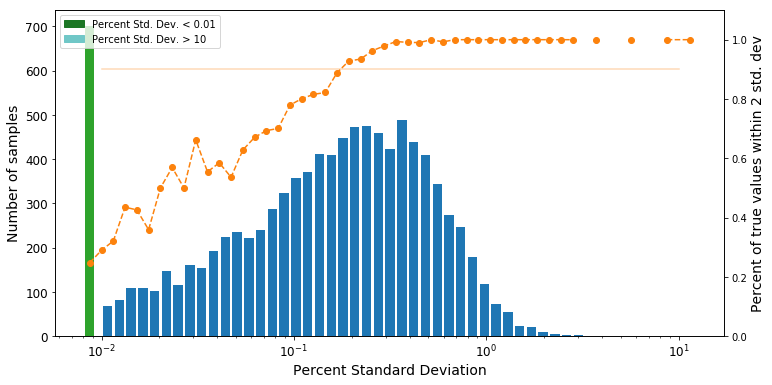

In [149]:
import matplotlib.patches as mpatches

def binning(results, bins):
    pctCounter = [[] for i in range(len(bins)+1)]
    bins = list(bins) + [np.inf]
    for res in results:
        k = 0
        while res[0] > bins[k]:
            k += 1
        pctCounter[k].append(res[1])
    return [np.mean(i) for i in pctCounter]

lowest = 0.01
highest = 10

fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(111)
bins = np.logspace(np.log10(lowest), np.log10(highest), 50)
ax1.hist([res[0] for res in results], bins=bins, rwidth=0.8)
ax1.set_xscale('log')

ax1.bar([bins[0]*bins[0]/bins[1]], [sum([1 for res in results if res[0]<lowest])], width=(bins[1]-bins[0])*0.6, color='#2EA32C')
ax1.bar([bins[-1]*bins[-1]/bins[-2]], [sum([1 for res in results if res[0]>highest])], width=(bins[-1]/bins[-2])*0.9, color='#70C7C7')

ax2 = ax1.twinx()
pct = binning(results, bins)
ax2.plot([bins[0]*bins[0]/bins[1]] + list(bins[:-1]) + [bins[-1]*bins[-1]/bins[-2]], pct, 'o--', color='#FC820D')
ax2.set_ylim([0, 1.1])
ax2.plot([0.01, 10], [0.9, 0.9], '#FC820D', alpha=0.3)

plot.set_ticks_size(ax1)
plot.set_ticks_size(ax2)
ax1.set_ylabel('Number of samples', fontsize=14)
ax1.set_xlabel('Percent Standard Deviation', fontsize=14)
ax2.set_ylabel('Percent of true values within 2 std. dev', fontsize=14)

handle = [mpatches.Patch(color='#1C7725', label='Percent Std. Dev. < 0.01'),
          mpatches.Patch(color='#70C7C7', label='Percent Std. Dev. > 10')]
ax1.legend(handles=handle, loc=2)


fig.savefig('/home/yuning/Work/ribozyme_pred/fig/ci_est/simuSet_1_method_3.png', dpi=300)
plt.show()

In [532]:
util.dump_pickle(data=simuSet, dirc='/mnt/storage/projects/ribozyme_predict/data/k_seq/fit_simu/simuSet_1_method_3_res.pkl', log='10000 simulated data on [3,3,3,3] using method 3: calculated from 3 randomly selected series', overwrite=False)

File exist, do you want to overwrite? (Y/N)Y
Data has been saved to /mnt/storage/projects/ribozyme_predict/data/k_seq/fit_simu/simuSet_1_method_3_res.pkl


### Method 4

In [ ]:
simuSet = util.load_pickle('/mnt/storage/projects/ribozyme_predict/data/k_seq/fit_simu/simuSet_1.pkl')
for sample in simuSet:
    var, std = method_4(sample)
    sample['estVar'] = var
    sample['estStd'] = std

results = [[sample['estStd'][2]/sample['estVar'][2], int(sample['estStd'][2] - 2* sample['estVar'][2] < sample['kA'] < sample['estStd'][2] + 2* sample['estVar'][2])] for sample in simuSet]

In [150]:
simuSet = util.load_pickle('/mnt/storage/projects/ribozyme_predict/data/k_seq/fit_simu/simuSet_1_method_4_res.pkl')

pctSuccess, results = k_seq.confidence_estimation.results_survey(simuSet)

simuSet_1_method_4_res.pkl:
10000 simulated data on [3,3,3,3] using method 4: jackknife 1-delete


simuSet_1_method_4_res.pkl:
10000 simulated data on [3,3,3,3] using method 4: jackknife 1-delete


/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


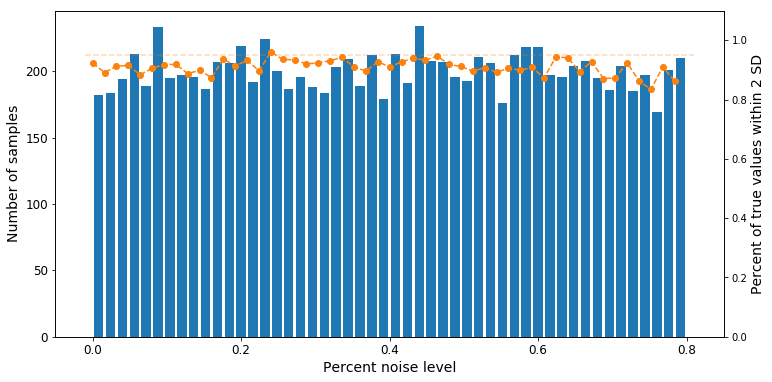

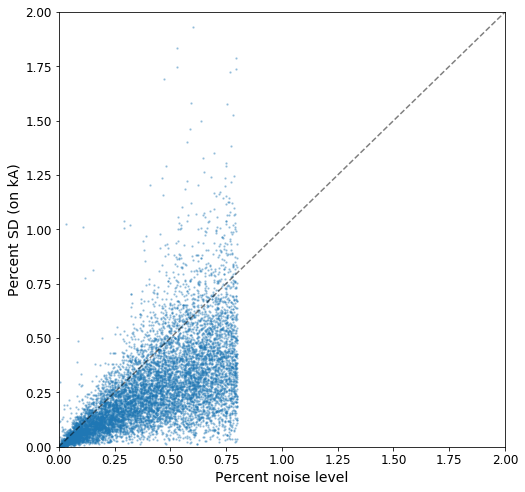

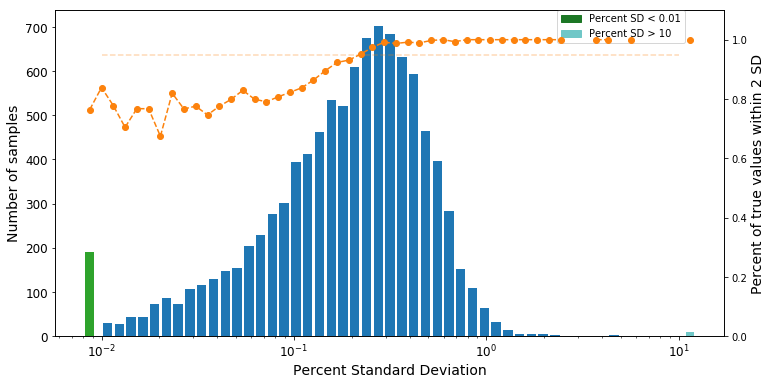

In [122]:
mtd = 4

import matplotlib.pyplot as plt
import plot
import matplotlib.patches as mpatches
import numpy as np

def results_survey(simuSet):
    def check(sample):
        if str(list(sample['config'])) == str([0, 0, 0, 0]):
            return 0
        elif np.isnan(sample['estStd'][2]) or np.isinf(sample['estStd'][2]):
            return 0
        else:
            return 1

    pctSuccess = sum([check(sample) for sample in simuSet])/ len(simuSet)
    for sample in simuSet:
        sample['estStd'] = sample['estStd'] * np.sqrt(np.sum(sample['config']))
    results = [[sample['err'],
                sample['estStd'][2] / sample['estVar'][2],
                int(sample['estVar'][2] - 2 * sample['estStd'][2] < sample['kA'] < sample['estVar'][2] + 2 * sample['estStd'][2])]
                for sample in simuSet if check(sample)==1]
    return pctSuccess, results

simuSet = util.load_pickle('/mnt/storage/projects/k-seq/working/archive/fit_simu/simuSet_1_method_{}_res.pkl'.format(mtd))
pctSuccess, results = results_survey(simuSet)


def binning(results, ix, bins):
    pctCounter = [[] for i in range(len(bins)+1)]
    bins = list(bins) + [np.inf]
    for res in results:
        k = 0
        while res[ix] > bins[k]:
            k += 1
        pctCounter[k].append(res[-1])
    return [np.mean(i) for i in pctCounter]

lowest = 0
highest = 0.8

fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(111)
bins = np.linspace(lowest, highest, 51)
ax1.hist([res[0] for res in results], bins=bins, rwidth=0.8)

ax2 = ax1.twinx()
pct = binning(results, 0, bins)
ax2.plot([bins[0]*bins[0]/bins[1]] + list(bins[:-1]) + [bins[-1]*bins[-1]/bins[-2]], pct, 'o--', color='#FC820D')
ax2.set_ylim([0, 1.1])
ax2.plot([-0.01, 0.81], [0.95, 0.95], color='#FC820D', ls='--', alpha=0.3)

plot.set_ticks_size(ax1)
plot.set_ticks_size(ax2)
ax1.set_ylabel('Number of samples', fontsize=14)
ax1.set_xlabel('Percent noise level', fontsize=14)
ax2.set_ylabel('Percent of true values within 2 SD', fontsize=14)


fig.savefig('/mnt/chen-nas/Users/Yuning/figures/simuSet_1_method_{}_1.png'.format(mtd), dpi=300)
plt.show()

fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(111)
ax.scatter([sample['err'] for sample in simuSet], [sample['estStd'][2]/sample['estVar'][2] for sample in simuSet], s=2, alpha=0.3)
plot.set_ticks_size(ax)
ax.set_ylim([0, 2])
ax.set_xlim([0, 2])
ax.plot([0, 2], [0, 2], 'k--', alpha=0.5)
ax.set_xlabel('Percent noise level', fontsize=14)
ax.set_ylabel('Percent SD (on kA)', fontsize=14)
fig.savefig('/mnt/chen-nas/Users/Yuning/figures/simuSet_1_method_{}_2.png'.format(mtd), dpi=300)
plt.show()

lowest = 0.01
highest = 10

fig = plt.figure(figsize=[12,6])
## Plot histogram
ax1 = fig.add_subplot(111)
bins = np.logspace(np.log10(lowest), np.log10(highest), 50)
ax1.hist([res[1] for res in results], bins=bins, rwidth=0.8)
ax1.set_xscale('log')
## Add two extra bins
ax1.bar([bins[0]*bins[0]/bins[1]], [sum([1 for res in results if res[1] < lowest])], width=(bins[1]-bins[0])*0.6, color='#2EA32C')
ax1.bar([bins[-1]*bins[-1]/bins[-2]], [sum([1 for res in results if res[1] > highest])], width=(bins[-1]/bins[-2])*0.9, color='#70C7C7')

ax2 = ax1.twinx()
pct = binning(results, 1, bins)
ax2.plot([bins[0]*bins[0]/bins[1]] + list(bins[:-1]) + [bins[-1]*bins[-1]/bins[-2]], pct, 'o--', color='#FC820D')
ax2.set_ylim([0, 1.1])
ax2.plot([0.01, 10], [0.95, 0.95], color='#FC820D', ls='--', alpha=0.3)

plot.set_ticks_size(ax1)
plot.set_ticks_size(ax2)
ax1.set_ylabel('Number of samples', fontsize=14)
ax1.set_xlabel('Percent Standard Deviation', fontsize=14)
ax2.set_ylabel('Percent of true values within 2 SD', fontsize=14)

handle = [mpatches.Patch(color='#1C7725', label='Percent SD < 0.01'),
          mpatches.Patch(color='#70C7C7', label='Percent SD > 10')]
ax1.legend(handles=handle, loc=[0.75, 0.9])


fig.savefig('/mnt/chen-nas/Users/Yuning/figures/simuSet_1_method_{}.png'.format(mtd), dpi=300)
plt.show()



In [536]:
util.dump_pickle(data=simuSet, dirc='/mnt/storage/projects/ribozyme_predict/data/k_seq/fit_simu/simuSet_1_method_4_res.pkl', log='10000 simulated data on [3,3,3,3] using method 4: jackknife 1-delete', overwrite=False)

File exist, do you want to overwrite? (Y/N)Y
Data has been saved to /mnt/storage/projects/ribozyme_predict/data/k_seq/fit_simu/simuSet_1_method_4_res.pkl


### Method 5

Bootstrap by fixing X but resampling residues (percent)

In [539]:
bsDepth = 500
simuSet = util.load_pickle('/mnt/storage/projects/ribozyme_predict/data/k_seq/fit_simu/simuSet_1.pkl')
simuSet = simuSet[:10]
for sample in simuSet:
    var, std = method_5(sample)
    sample['estVar'] = var
    sample['estStd'] = std

# results = [[sample['estStd'][2]/sample['estVar'][2], int(sample['estStd'][2] - 2* sample['estVar'][2] < sample['kA'] < sample['estStd'][2] + 2* sample['estVar'][2])] for sample in simuSet]

simuSet_1.pkl:
10000 simulated data on [3,3,3,3]


In [548]:
util.dump_pickle(simuSet, '/mnt/storage/projects/ribozyme_predict/data/k_seq/fit_simu/simuSet_1_method_5_patialRes.pkl', log='Only ten bootstrap simulations from simuSet 1', overwrite=False)

Data has been saved to /mnt/storage/projects/ribozyme_predict/data/k_seq/fit_simu/simuSet_1_method_5_patialRes.pkl


simuSet_1_method_5_patialRes.pkl:
Only ten bootstrap simulations from simuSet 1


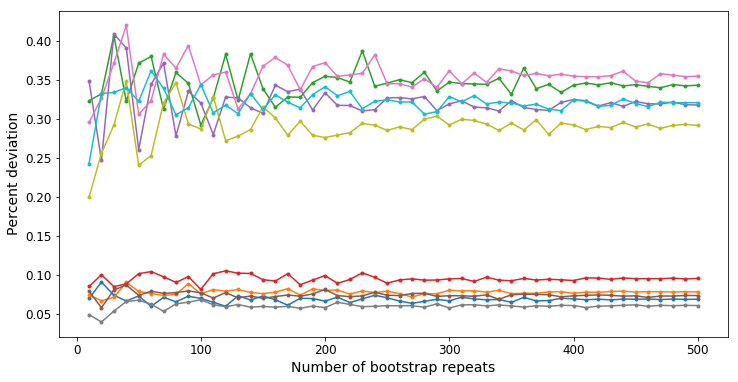

In [153]:
simuSet = util.load_pickle('/mnt/storage/projects/ribozyme_predict/data/k_seq/fit_simu/simuSet_1_method_5_patialRes.pkl')

bsSizes = [(i+1)*10 for i in range(50)]
for sample in simuSet:
    kAList = np.array(sample['estStd']).T[2]
    bsProfile = []
    for setSize in bsSizes:
        selected = np.random.choice(kAList, replace=False, size=setSize)
        bsProfile.append({
            'mean': np.mean(selected),
            'std': np.std(selected, ddof=1),
            'pct2.5': np.percentile(selected, 2.5),
            'pct97.5': np.percentile(selected, 97.5)
        })
    sample['bsProfile'] = bsProfile

fig = plt.figure(figsize=[12,6])
ax = fig.add_subplot(111)
for sample in simuSet:
    ax.plot(bsSizes, [bs['std']/bs['mean'] for bs in sample['bsProfile']], '.-')
plot.set_ticks_size(ax)
ax.set_xlabel('Number of bootstrap repeats', fontsize=14)
ax.set_ylabel('Percent deviation', fontsize=14)
fig.savefig('/home/yuning/Work/ribozyme_pred/fig/ci_est/simuSet_1_partial_method_5_bs_converge.png', dpi=300)
plt.show()

simuSet_1_method_4_res.pkl:
10000 simulated data on [3,3,3,3] using method 4: jackknife 1-delete
simuSet_1_method_4_parallel_res.pkl:
10000 simulated data on [3,3,3,3] using method 5: bootstrap residues for 500 times, parallelized


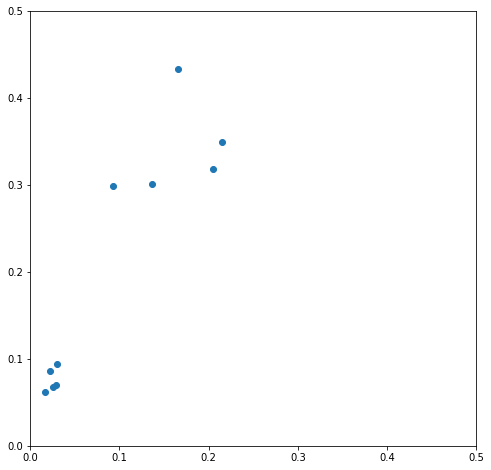

In [2]:
simuSet_jk = util.load_pickle('/mnt/storage/projects/ribozyme_predict/data/k_seq/fit_simu/simuSet_1_method_4_res.pkl')
simuSet = util.load_pickle('/mnt/storage/projects/ribozyme_predict/data/k_seq/fit_simu/simuSet_1_method_4_parallel_res.pkl')

plt.figure(figsize=[8,8])
plt.scatter([sample['estStd'][2]/sample['estVar'][2] for sample in simuSet_jk[:10]], [np.nanstd(sample['estStd'], ddof=1, axis=0)[2]/sample['estVar'][2] for sample in simuSet[:10]])
plt.xlim([0, 0.5])
plt.ylim([0, 0.5])
plt.show()

In [3]:
simuSet

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


#### Parallel version

In [571]:
## See ci_est_method_5.py for details

import multiprocessing as mp

def method_5_multi(sample):
    from scipy.optimize import curve_fit
    def func(x, A, k):
        return A * (1-np.exp(-0.479 * 90 * k * x))
    
    
    x = np.array([sample['x'] for i in range(3)])
    y = sample['data']
    x_ = np.reshape(x, x.shape[0]*x.shape[1])
    y_ = np.reshape(y, y.shape[0]*y.shape[1])
    valid = ~np.isnan(y_)
    try:
        initGuess = (np.random.random(), np.random.random())
        popt, pcov = curve_fit(func, x_[valid], y_[valid], method='trf', bounds=([0, 0], [1., np.inf]), p0=initGuess)
    except RuntimeError:
        popt = [0,0]
    var = [popt[0], popt[1], popt[0]*popt[1]]
    
    # Bootstrap
    varList = []
    x_ = x_[valid]
    y_ = y_[valid]
    yPredicted = func(x_, popt[0], popt[1])
    pctRes = (y_-yPredicted)/yPredicted
    
    for i in range(bsDepth):
        pctResResampled = np.random.choice(pctRes, replace=True, size=len(pctRes))
        yToFit = yPredicted + yPredicted*pctResResampled
        try:
            initGuess = (np.random.random(), np.random.random())
            popt, pcov = curve_fit(func, x_, yToFit, method='trf', bounds=([0, 0], [1., np.inf]), p0=initGuess)
        except RuntimeError:
            popt = [0,0]
        except:
            print(sample)
        varList.append([popt[0], popt[1], popt[0]*popt[1]])
    sample['estVar'] = var
    sample['estStd'] = varList
    return sample


if __name__=='__main__':
    
    pool = mp.Pool(processes=8)
    
    bsDepth = 500
    simuSet = util.load_pickle('/mnt/storage/projects/ribozyme_predict/data/k_seq/fit_simu/simuSet_1.pkl')
    simuSet = simuSet[:100]
    
    simuSet = pool.map(method_5_multi, simuSet)
    
    # 

simuSet_1.pkl:
10000 simulated data on [3,3,3,3]


In [2]:
import util
simuSet = util.load_pickle('/mnt/storage/projects/ribozyme_predict/k_seq/fit_simu/simuSet_1_method_4_parallel_res.pkl')

simuSet_1_method_4_parallel_res.pkl:
10000 simulated data on [3,3,3,3] using method 5: bootstrap residues for 500 times, parallelized


In [128]:
len(simuSet)

10000

simuSet_1_method_4_parallel_res.pkl:
10000 simulated data on [3,3,3,3] using method 5: bootstrap residues for 500 times, parallelized


/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


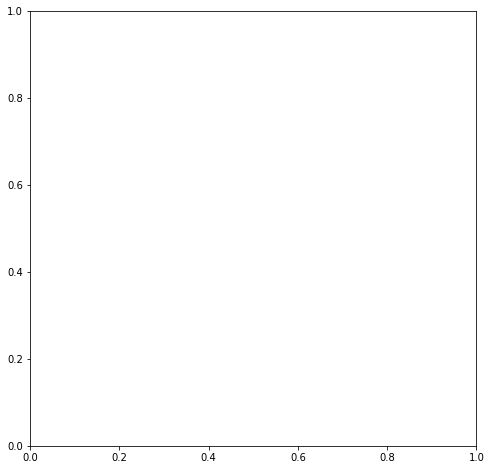

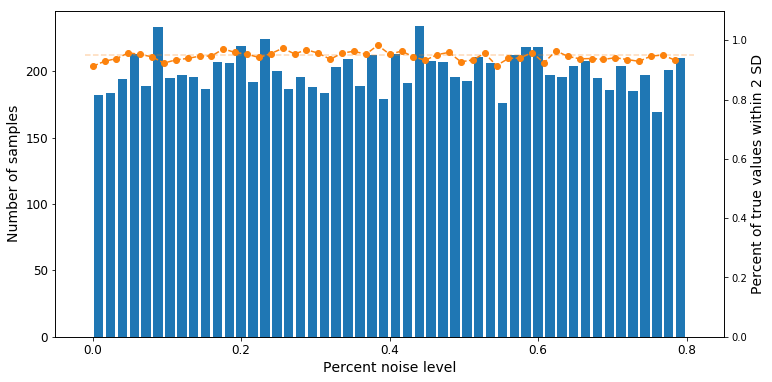

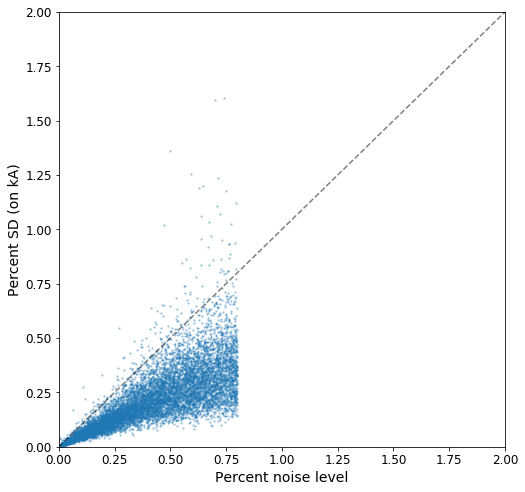

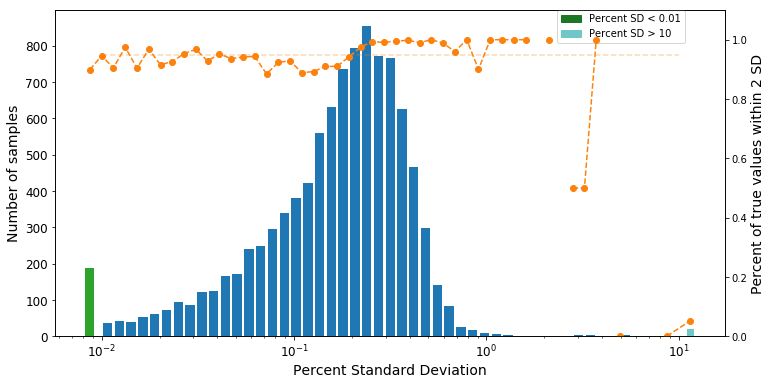

In [130]:
mtd = 5

import matplotlib.pyplot as plt
import plot
import matplotlib.patches as mpatches
import numpy as np

def results_survey(simuSet, percentile=False):
    pctSuccess = len([1 for sample in simuSet if len(sample['estStd']) != 1])/ len(simuSet)
    if percentile:
        results = [[sample['err'],
                    np.std(sample['estStd'], axis=0, ddof=1)[2] / sample['estVar'][2],
                    int(np.percentile(sample['estStd'], 2.5, axis=0)[2] < sample['kA'] < np.percentile(sample['estStd'], 97.5, axis=0)[2])]
                   for sample in simuSet if len(sample['estStd']) > 1]
    else:
        results = [[sample['err'],
                    np.std(sample['estStd'], axis=0, ddof=1)[2]/sample['estVar'][2],
                    int(sample['estVar'][2] - 2* np.std(sample['estStd'], axis=0, ddof=1)[2] < sample['kA'] < sample['estVar'][2] + 2* np.std(sample['estStd'], axis=0, ddof=1)[2])]
                   for sample in simuSet if len(sample['estStd']) > 1]
    return pctSuccess, results

simuSet = util.load_pickle('/mnt/storage/projects/k-seq/working/archive/fit_simu/simuSet_1_method_4_parallel_res.pkl'.format(mtd))
pctSuccess, results = results_survey(simuSet, percentile=False)

def binning(results, ix, bins):
    pctCounter = [[] for i in range(len(bins)+1)]
    bins = list(bins) + [np.inf]
    for res in results:
        k = 0
        while res[ix] > bins[k]:
            k += 1
        pctCounter[k].append(res[-1])
    return [np.mean(i) for i in pctCounter]

lowest = 0
highest = 0.8

fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(111)
bins = np.linspace(lowest, highest, 51)
ax1.hist([res[0] for res in results], bins=bins, rwidth=0.8)

ax2 = ax1.twinx()
pct = binning(results, 0, bins)
ax2.plot([bins[0]*bins[0]/bins[1]] + list(bins[:-1]) + [bins[-1]*bins[-1]/bins[-2]], pct, 'o--', color='#FC820D')
ax2.set_ylim([0, 1.1])
ax2.plot([-0.01, 0.81], [0.95, 0.95], color='#FC820D', ls='--', alpha=0.3)

plot.set_ticks_size(ax1)
plot.set_ticks_size(ax2)
ax1.set_ylabel('Number of samples', fontsize=14)
ax1.set_xlabel('Percent noise level', fontsize=14)
ax2.set_ylabel('Percent of true values within 2 SD', fontsize=14)
fig.savefig('/mnt/chen-nas/Users/Yuning/figures/simuSet_1_method_{}_1.png'.format(mtd), dpi=300)
plt.show()

fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(111)
ax.scatter([sample[0] for sample in results], [sample[1] for sample in results], s=2, alpha=0.3)
plot.set_ticks_size(ax)
ax.set_ylim([0, 2])
ax.set_xlim([0, 2])
ax.plot([0, 2], [0, 2], 'k--', alpha=0.5)
ax.set_xlabel('Percent noise level', fontsize=14)
ax.set_ylabel('Percent SD (on kA)', fontsize=14)
fig.savefig('/mnt/chen-nas/Users/Yuning/figures/simuSet_1_method_{}_2.png'.format(mtd), dpi=300)
plt.show()

lowest = 0.01
highest = 10

fig = plt.figure(figsize=[12,6])
## Plot histogram
ax1 = fig.add_subplot(111)
bins = np.logspace(np.log10(lowest), np.log10(highest), 50)
ax1.hist([res[1] for res in results], bins=bins, rwidth=0.8)
ax1.set_xscale('log')
## Add two extra bins
ax1.bar([bins[0]*bins[0]/bins[1]], [sum([1 for res in results if res[1] < lowest])], width=(bins[1]-bins[0])*0.6, color='#2EA32C')
ax1.bar([bins[-1]*bins[-1]/bins[-2]], [sum([1 for res in results if res[1] > highest])], width=(bins[-1]/bins[-2])*0.9, color='#70C7C7')

ax2 = ax1.twinx()
pct = binning(results, 1, bins)
ax2.plot([bins[0]*bins[0]/bins[1]] + list(bins[:-1]) + [bins[-1]*bins[-1]/bins[-2]], pct, 'o--', color='#FC820D')
ax2.set_ylim([0, 1.1])
ax2.plot([0.01, 10], [0.95, 0.95], color='#FC820D', ls='--', alpha=0.3)

plot.set_ticks_size(ax1)
plot.set_ticks_size(ax2)
ax1.set_ylabel('Number of samples', fontsize=14)
ax1.set_xlabel('Percent Standard Deviation', fontsize=14)
ax2.set_ylabel('Percent of true values within 2 SD', fontsize=14)

handle = [mpatches.Patch(color='#1C7725', label='Percent SD < 0.01'),
          mpatches.Patch(color='#70C7C7', label='Percent SD > 10')]
ax1.legend(handles=handle, loc=[0.75, 0.9])


fig.savefig('/mnt/chen-nas/Users/Yuning/figures/simuSet_1_method_{}.png'.format(mtd), dpi=300)
plt.show()

/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


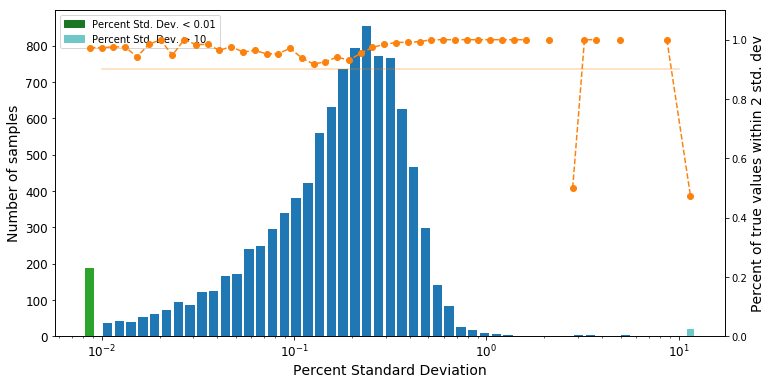

In [13]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import plot


lowest = 0.01
highest = 10

fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(111)
bins = np.logspace(np.log10(lowest), np.log10(highest), 50)
ax1.hist([res[0] for res in results], bins=bins, rwidth=0.8)
ax1.set_xscale('log')

ax1.bar([bins[0]*bins[0]/bins[1]], [sum([1 for res in results if res[0]<lowest])], width=(bins[1]-bins[0])*0.6, color='#2EA32C')
ax1.bar([bins[-1]*bins[-1]/bins[-2]], [sum([1 for res in results if res[0]>highest])], width=(bins[-1]/bins[-2])*0.9, color='#70C7C7')

ax2 = ax1.twinx()
pct = binning(results, bins)
ax2.plot([bins[0]*bins[0]/bins[1]] + list(bins[:-1]) + [bins[-1]*bins[-1]/bins[-2]], pct, 'o--', color='#FC820D')
ax2.set_ylim([0, 1.1])
ax2.plot([0.01, 10], [0.9, 0.9], '#FC820D', alpha=0.3)

plot.set_ticks_size(ax1)
plot.set_ticks_size(ax2)
ax1.set_ylabel('Number of samples', fontsize=14)
ax1.set_xlabel('Percent Standard Deviation', fontsize=14)
ax2.set_ylabel('Percent of true values within 2 std. dev', fontsize=14)

handle = [mpatches.Patch(color='#1C7725', label='Percent Std. Dev. < 0.01'),
          mpatches.Patch(color='#70C7C7', label='Percent Std. Dev. > 10')]
ax1.legend(handles=handle, loc=2)


# fig.savefig('/home/yuning/Work/ribozyme_pred/fig/ci_est/simuSet_1_method_5.png', dpi=300)
plt.show()

In [15]:
results = [[sample['estVar'][2] - 2* np.nanstd(sample['estStd'], axis=0, ddof=1)[2], sample['estVar'][2] + 2* np.nanstd(sample['estStd'], axis=0, ddof=1)[2], np.nanpercentile(sample['estStd'], 2.5, axis=0)[2], np.nanpercentile(sample['estStd'], 97.5, axis=0)[2]] for sample in simuSet if len(sample['estStd']) > 1]

In [17]:
results = np.array(results).T

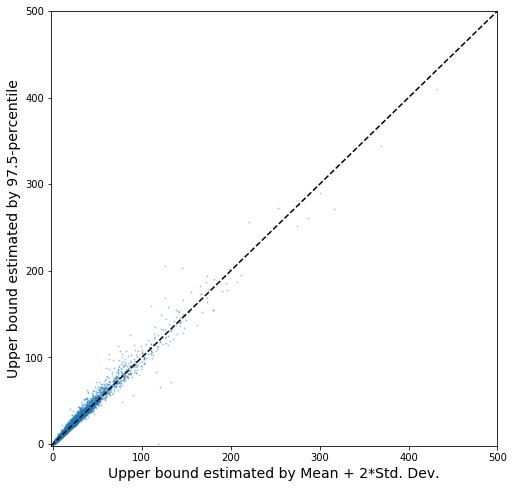

In [30]:
fig = plt.figure(figsize=[8, 8])
plt.scatter(results[1], results[3], s=1, alpha=0.3)
plt.xlim([-2, 500])
plt.ylim([-2, 500])
plt.plot([-2, 500], [-2, 500], 'k--')
plt.xlabel('Upper bound estimated by Mean + 2*Std. Dev.', fontsize=14)
plt.ylabel('Upper bound estimated by 97.5-percentile', fontsize=14)
plt.show()

### Cross comparison

In [139]:
simuSet = util.load_pickle('/mnt/storage/projects/k-seq/working/archive/fit_simu/simuSet_1_method_1_res.pkl')
for sample in simuSet:
    if str(list(sample['config'])) == str([0, 0, 0, 0]):
        sample['mtd1'] = [np.nan, np.nan, np.nan]
    else:
        sample['mtd1'] = np.array(sample['estStd'])/np.array(sample['estVar'])
simuSet2 = util.load_pickle('/mnt/storage/projects/k-seq/working/archive/fit_simu/simuSet_1_method_2_res.pkl')
for ix, sample in enumerate(simuSet):
    if str(sample['config']) != str(simuSet2[ix]['config']):
        print('Data not aligned in Method 2')
        print(sample['estVar'])
        print(simuSet2[ix]['estVar'])
    if str(list(simuSet2[ix]['config'])) == str([0, 0, 0, 0]):
        sample['mtd2'] = [np.nan, np.nan, np.nan]
    else:
        sample['mtd2'] = np.array(simuSet2[ix]['estStd'])/np.array(simuSet2[ix]['estVar'])
simuSet2 = util.load_pickle('/mnt/storage/projects/k-seq/working/archive/fit_simu/simuSet_1_method_3_res.pkl')
for ix, sample in enumerate(simuSet):
    if str(sample['config']) != str(simuSet2[ix]['config']):
        print('Data not aligned in Method 3')
    if str(list(simuSet2[ix]['config'])) == str([0, 0, 0, 0]):
        sample['mtd3'] = [np.nan, np.nan, np.nan]
    else:
        sample['mtd3'] = np.array(simuSet2[ix]['estStd'])/np.array(simuSet2[ix]['estVar'])
simuSet2 = util.load_pickle('/mnt/storage/projects/k-seq/working/archive/fit_simu/simuSet_1_method_4_res.pkl')
for ix, sample in enumerate(simuSet):
    if str(sample['config']) != str(simuSet2[ix]['config']):
        print('Data not aligned in Method 4')
    if str(list(simuSet2[ix]['config'])) == str([0, 0, 0, 0]):
        sample['mtd4'] = [np.nan, np.nan, np.nan]
    else:
        sample['mtd4'] = np.array(simuSet2[ix]['estStd'])*np.sqrt(np.sum(simuSet2[ix]['config']))/np.array(simuSet2[ix]['estVar'])
simuSet2 = util.load_pickle('/mnt/storage/projects/k-seq/working/archive/fit_simu/simuSet_1_method_4_parallel_res.pkl')
for ix, sample in enumerate(simuSet):
    if str(sample['config']) != str(simuSet2[ix]['config']):
        print('Data not aligned in Method 5')
    sample['mtd5All'] = simuSet2[ix]['estStd']
    if len(simuSet2[ix]['estStd']) > 1:
        sample['mtd5'] = np.std(simuSet2[ix]['estStd'], axis=0, ddof=1)/np.array(simuSet2[ix]['estVar'])
    else:
        sample['mtd5'] = [np.nan, np.nan, np.nan]
util.dump_pickle(data=simuSet,
                 dirc='/mnt/storage/projects/k-seq/working/archive/fit_simu/simuSet_1_full.pkl',
                 log='Pooled CI estimation results from 5 methods',
                 overwrite=True)

simuSet_1_method_1_res.pkl:
10000 simulated data on [3,3,3,3] using method 1: simply from pcov in curve_fit
simuSet_1_method_2_res.pkl:
10000 simulated data on [3,3,3,3] using method 2: calculated from 3 manually selected series
simuSet_1_method_3_res.pkl:
10000 simulated data on [3,3,3,3] using method 3: calculated from 3 randomly selected series
simuSet_1_method_4_res.pkl:
10000 simulated data on [3,3,3,3] using method 4: jackknife 1-delete
simuSet_1_method_4_parallel_res.pkl:
10000 simulated data on [3,3,3,3] using method 5: bootstrap residues for 500 times, parallelized


In [143]:
simuSet = util.load_pickle('/mnt/storage/projects/k-seq/working/archive/fit_simu/simuSet_1_full.pkl')

Data has been saved to /mnt/storage/projects/k-seq/working/archive/fit_simu/simuSet_1_full.pkl


In [144]:
simuSet[1]

{'A': 0.16869279180798458,
 'config': array([3, 3, 3, 3]),
 'data': array([[0.02365816, 0.00352398, 0.00070016, 0.00013225],
        [0.0184156 , 0.00437509, 0.00078806, 0.0001783 ],
        [0.02129804, 0.00333714, 0.00065769, 0.00011582]]),
 'err': 0.16796851337768076,
 'estStd': [16.775455378730154, 38.82150786363559, 0.40293631148902376],
 'estVar': [0.9283556507961501, 2.124690627882291, 1.972468550588145],
 'k': array([10.96902333]),
 'kA': array([1.85039517]),
 'mtd1': array([18.07007408, 18.27160498,  0.20428022]),
 'mtd2': array([ 0.51207   , 10.53898264,  0.05465116]),
 'mtd3': array([0.06216123, 0.16441501, 0.1255058 ]),
 'mtd4': array([0.15733746, 0.15281382, 0.08745252]),
 'mtd5': array([0.410985  , 7.24317682, 0.06756239]),
 'mtd5All': [[0.15356180823690113, 12.260826313831874, 1.8827946592306015],
  [0.09389359082018829, 20.431524808791046, 1.9183892302291523],
  [0.936865537249313, 2.0448606973457433, 1.9157595158188245],
  [0.704566630845905, 2.4469369525985374, 1.7240

limit_output extension: Maximum message size of 10000 exceeded with 32633 characters

In [145]:
stdScatter = np.array([[sample['mtd%i'%ix][2] for ix in [1, 2, 3, 4, 5]] for sample in simuSet]).T

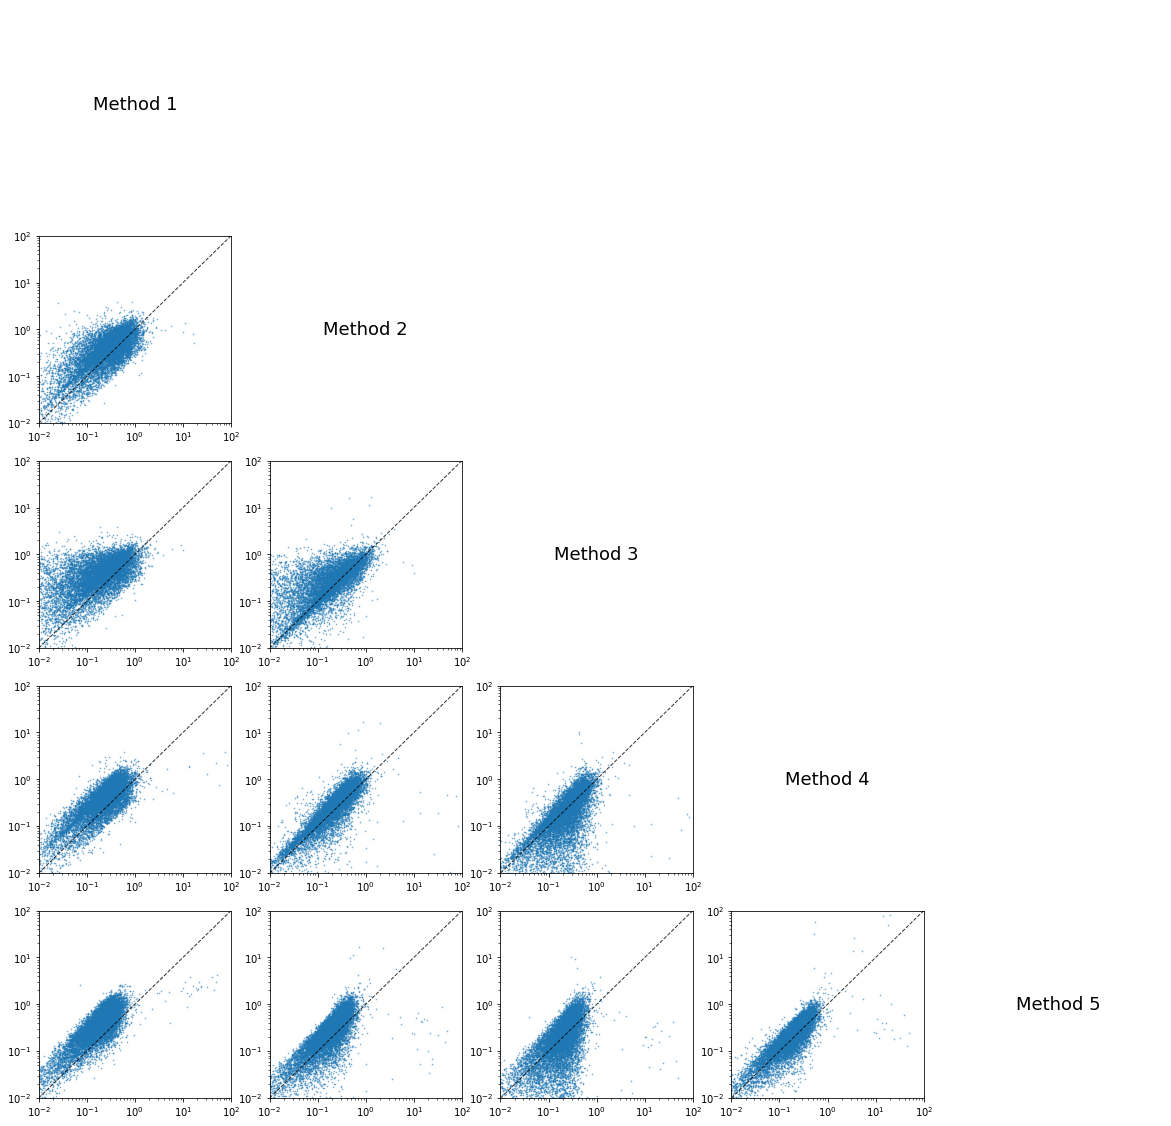

In [150]:
fig,axes = plt.subplots(5, 5, figsize=[20, 20])
for i in range(5):
    for j in range(5):
        ax = axes[i,j]
        if i > j:
            ax.scatter(stdScatter[i], stdScatter[j], s=0.5, alpha=0.5)
            ax.plot([0.01, 100], [0.01, 100], 'k--', lw=1, alpha=0.8)
            ax.set_xscale('log')
            ax.set_yscale('log')
        elif i == j:
            ax.text(s = 'Method %i' %(i+1), x=50, y=50, ha='center', va='center', fontsize=18)
            ax.axis('off')
        else:
            ax.axis('off')
        ax.set_xlim([0.01, 100])
        ax.set_ylim([0.01, 100])
        
fig.savefig('/mnt/chen-nas/Users/Yuning/figures/simuSet_1_method_ALL.png', dpi=300)
plt.show()

## Results on Dataset 2
### Method 1

In [74]:
from importlib import reload
reload(k_seq.confidence_estimation)

simuSet = util.load_pickle('/mnt/storage/projects/ribozyme_predict/data/k_seq/fit_simu/simuSet_2_full.pkl')
for sample in simuSet:
    var, std = k_seq.confidence_estimation.method_1(sample)
    sample['estVar'] = var
    sample['estStd'] = std

util.dump_pickle(data=simuSet,
                 dirc='/mnt/storage/projects/ribozyme_predict/data/k_seq/fit_simu/simuSet_2_full_method_1_res.pkl',
                 log='Estimation results from method 1 on simuSet 2',
                 overwrite=False)

simuSet_2_full.pkl:
10000 simulated data from random configs with set detection times, 2000 detected 4 times, 3000 detected 3 times, 5000 detected 2 times


/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [162]:
simuSet = util.load_pickle('/mnt/storage/projects/ribozyme_predict/data/k_seq/fit_simu/simuSet_2_full_method_1_res.pkl')
pctSuccess, results = k_seq.confidence_estimation.results_survey(simuSet)

simuSet_2_full_method_1_res.pkl:
Estimation results from method 1 on simuSet 2


simuSet_2_full_method_1_res.pkl:
Estimation results from method 1 on simuSet 2
0.4785


/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


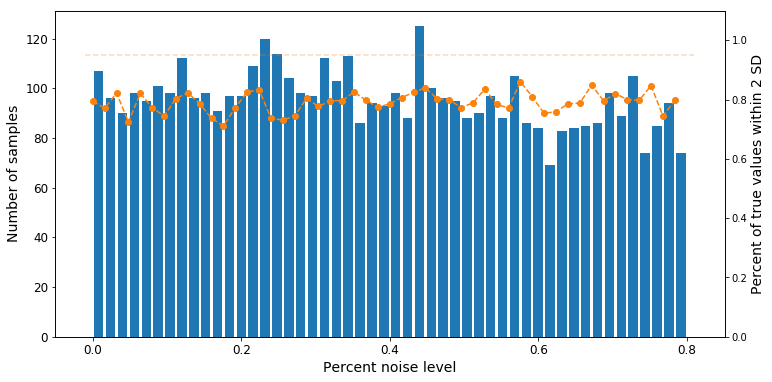

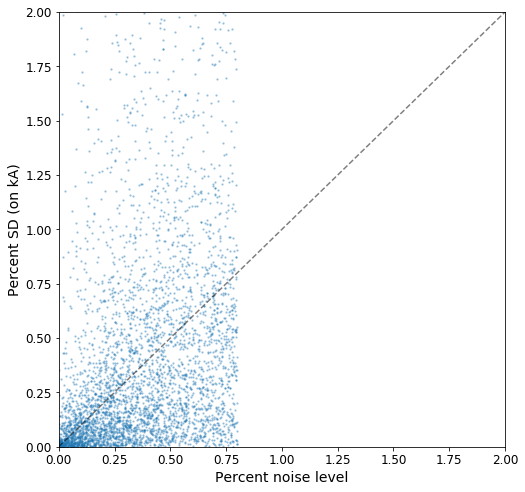

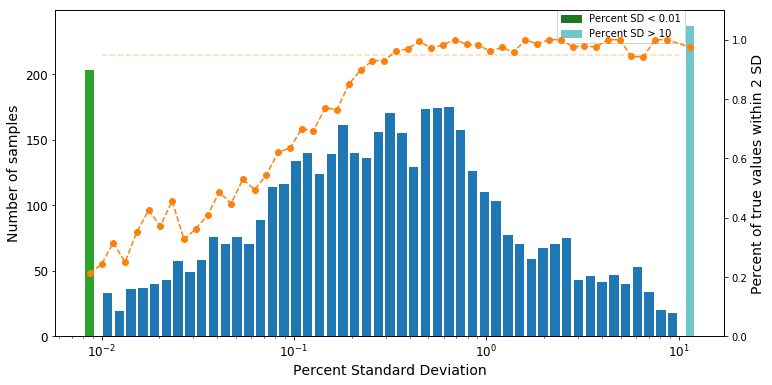

In [131]:
mtd = 1

import matplotlib.pyplot as plt
import plot
import matplotlib.patches as mpatches
import numpy as np

def results_survey(simuSet):
    def check(sample):
        if str(list(sample['config'])) == str([0, 0, 0, 0]):
            return 0
        elif np.isnan(sample['estStd'][2]) or np.isinf(sample['estStd'][2]):
            return 0
        else:
            return 1

    pctSuccess = sum([check(sample) for sample in simuSet])/ len(simuSet)
    results = [[sample['err'],
                sample['estStd'][2] / sample['estVar'][2],
                int(sample['estVar'][2] - 2 * sample['estStd'][2] < sample['kA'] < sample['estVar'][2] + 2 * sample['estStd'][2])]
                for sample in simuSet if check(sample)==1]
    return pctSuccess, results

simuSet = util.load_pickle('/mnt/storage/projects/k-seq/working/archive/fit_simu/simuSet_2_full_method_{}_res.pkl'.format(mtd))
pctSuccess, results = results_survey(simuSet)
print(pctSuccess)


def binning(results, ix, bins):
    pctCounter = [[] for i in range(len(bins)+1)]
    bins = list(bins) + [np.inf]
    for res in results:
        k = 0
        while res[ix] > bins[k]:
            k += 1
        pctCounter[k].append(res[-1])
    return [np.mean(i) for i in pctCounter]

lowest = 0
highest = 0.8

fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(111)
bins = np.linspace(lowest, highest, 51)
ax1.hist([res[0] for res in results], bins=bins, rwidth=0.8)

ax2 = ax1.twinx()
pct = binning(results, 0, bins)
ax2.plot([bins[0]*bins[0]/bins[1]] + list(bins[:-1]) + [bins[-1]*bins[-1]/bins[-2]], pct, 'o--', color='#FC820D')
ax2.set_ylim([0, 1.1])
ax2.plot([-0.01, 0.81], [0.95, 0.95], color='#FC820D', ls='--', alpha=0.3)

plot.set_ticks_size(ax1)
plot.set_ticks_size(ax2)
ax1.set_ylabel('Number of samples', fontsize=14)
ax1.set_xlabel('Percent noise level', fontsize=14)
ax2.set_ylabel('Percent of true values within 2 SD', fontsize=14)


fig.savefig('/mnt/chen-nas/Users/Yuning/figures/simuSet_2_method_{}_1.png'.format(mtd), dpi=300)
plt.show()

fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(111)
ax.scatter([sample['err'] for sample in simuSet], [sample['estStd'][2]/sample['estVar'][2] for sample in simuSet], s=2, alpha=0.3)
plot.set_ticks_size(ax)
ax.set_ylim([0, 2])
ax.set_xlim([0, 2])
ax.plot([0, 2], [0, 2], 'k--', alpha=0.5)
ax.set_xlabel('Percent noise level', fontsize=14)
ax.set_ylabel('Percent SD (on kA)', fontsize=14)
fig.savefig('/mnt/chen-nas/Users/Yuning/figures/simuSet_2_method_{}_2.png'.format(mtd), dpi=300)
plt.show()

lowest = 0.01
highest = 10

fig = plt.figure(figsize=[12,6])
## Plot histogram
ax1 = fig.add_subplot(111)
bins = np.logspace(np.log10(lowest), np.log10(highest), 50)
ax1.hist([res[1] for res in results], bins=bins, rwidth=0.8)
ax1.set_xscale('log')
## Add two extra bins
ax1.bar([bins[0]*bins[0]/bins[1]], [sum([1 for res in results if res[1] < lowest])], width=(bins[1]-bins[0])*0.6, color='#2EA32C')
ax1.bar([bins[-1]*bins[-1]/bins[-2]], [sum([1 for res in results if res[1] > highest])], width=(bins[-1]/bins[-2])*0.9, color='#70C7C7')

ax2 = ax1.twinx()
pct = binning(results, 1, bins)
ax2.plot([bins[0]*bins[0]/bins[1]] + list(bins[:-1]) + [bins[-1]*bins[-1]/bins[-2]], pct, 'o--', color='#FC820D')
ax2.set_ylim([0, 1.1])
ax2.plot([0.01, 10], [0.95, 0.95], color='#FC820D', ls='--', alpha=0.3)

plot.set_ticks_size(ax1)
plot.set_ticks_size(ax2)
ax1.set_ylabel('Number of samples', fontsize=14)
ax1.set_xlabel('Percent Standard Deviation', fontsize=14)
ax2.set_ylabel('Percent of true values within 2 SD', fontsize=14)

handle = [mpatches.Patch(color='#1C7725', label='Percent SD < 0.01'),
          mpatches.Patch(color='#70C7C7', label='Percent SD > 10')]
ax1.legend(handles=handle, loc=[0.75, 0.9])


fig.savefig('/mnt/chen-nas/Users/Yuning/figures/simuSet_2_method_{}.png'.format(mtd), dpi=300)
plt.show()



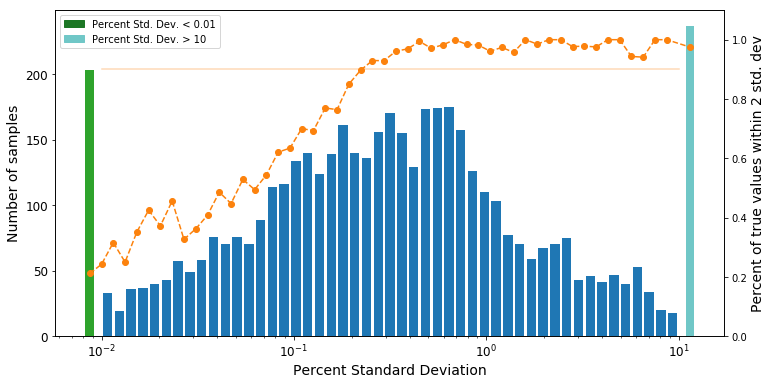

In [164]:
import matplotlib.patches as mpatches

def binning(results, bins):
    pctCounter = [[] for i in range(len(bins)+1)]
    bins = list(bins) + [np.inf]
    for res in results:
        k = 0
        while res[0] > bins[k]:
            k += 1
        pctCounter[k].append(res[1])
    return [np.mean(i) for i in pctCounter]

lowest = 0.01
highest = 10

fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(111)
bins = np.logspace(np.log10(lowest), np.log10(highest), 50)
ax1.hist([res[0] for res in results], bins=bins, rwidth=0.8)
ax1.set_xscale('log')

ax1.bar([bins[0]*bins[0]/bins[1]], [sum([1 for res in results if res[0]<lowest])], width=(bins[1]-bins[0])*0.6, color='#2EA32C')
ax1.bar([bins[-1]*bins[-1]/bins[-2]], [sum([1 for res in results if res[0]>highest])], width=(bins[-1]/bins[-2])*0.9, color='#70C7C7')

ax2 = ax1.twinx()
pct = binning(results, bins)
ax2.plot([bins[0]*bins[0]/bins[1]] + list(bins[:-1]) + [bins[-1]*bins[-1]/bins[-2]], pct, 'o--', color='#FC820D')
ax2.set_ylim([0, 1.1])
ax2.plot([0.01, 10], [0.9, 0.9], '#FC820D', alpha=0.3)

plot.set_ticks_size(ax1)
plot.set_ticks_size(ax2)
ax1.set_ylabel('Number of samples', fontsize=14)
ax1.set_xlabel('Percent Standard Deviation', fontsize=14)
ax2.set_ylabel('Percent of true values within 2 std. dev', fontsize=14)

handle = [mpatches.Patch(color='#1C7725', label='Percent Std. Dev. < 0.01'),
          mpatches.Patch(color='#70C7C7', label='Percent Std. Dev. > 10')]
ax1.legend(handles=handle, loc=2)


fig.savefig('/home/yuning/Work/ribozyme_pred/fig/ci_est/simuSet_2_method_1.png', dpi=300)
plt.show()

### Method 2

In [79]:
from importlib import reload
reload(k_seq.confidence_estimation)

simuSet = util.load_pickle('/mnt/storage/projects/ribozyme_predict/data/k_seq/fit_simu/simuSet_2_full.pkl')
for sample in simuSet:
    var, std = k_seq.confidence_estimation.method_2(sample)
    sample['estVar'] = var
    sample['estStd'] = std
util.dump_pickle(data=simuSet,
                 dirc='/mnt/storage/projects/ribozyme_predict/data/k_seq/fit_simu/simuSet_2_full_method_2_res.pkl',
                 log='Estimation results from method 2 on simuSet_2_full',
                 overwrite=False)
pctSuccess, results = k_seq.confidence_estimation.results_survey(simuSet)

simuSet_2_full.pkl:
10000 simulated data from random configs with set detection times, 2000 detected 4 times, 3000 detected 3 times, 5000 detected 2 times


/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


simuSet_2_full_method_2_res.pkl:
Estimation results from method 2 on simuSet_2_full
0.8247


/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


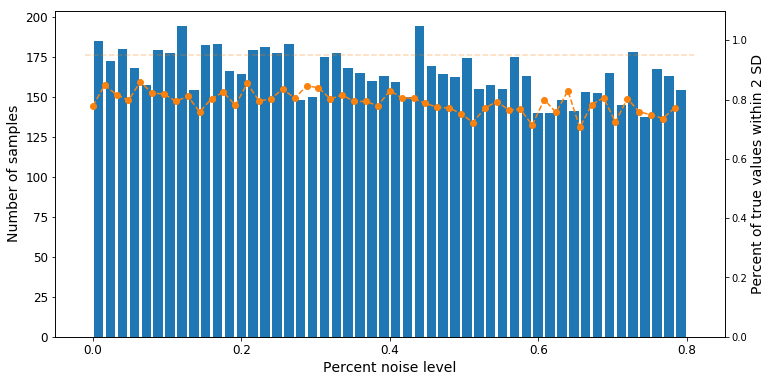

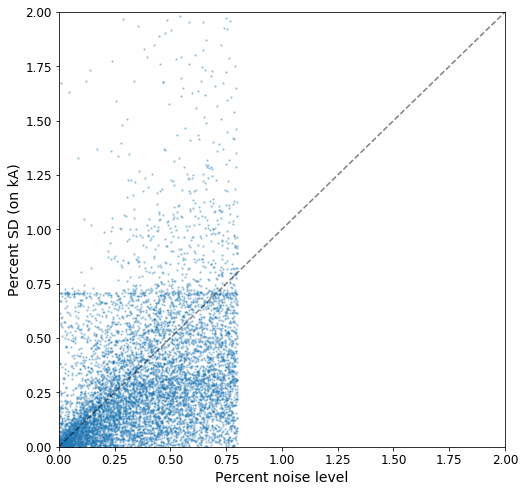

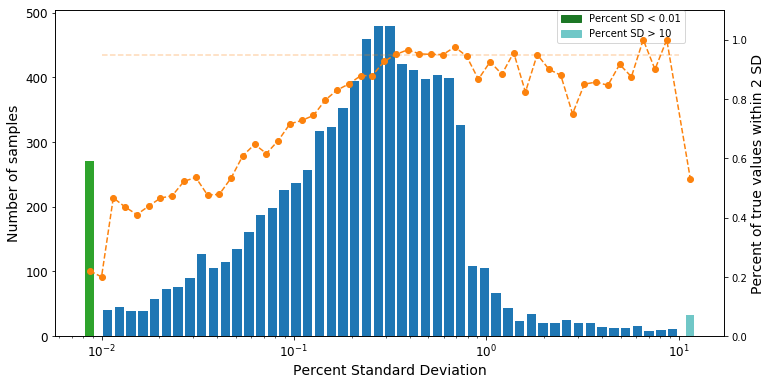

In [132]:
mtd = 2

import matplotlib.pyplot as plt
import plot
import matplotlib.patches as mpatches
import numpy as np

def results_survey(simuSet):
    def check(sample):
        if str(list(sample['config'])) == str([0, 0, 0, 0]):
            return 0
        elif np.isnan(sample['estStd'][2]) or np.isinf(sample['estStd'][2]):
            return 0
        else:
            return 1

    pctSuccess = sum([check(sample) for sample in simuSet])/ len(simuSet)
    results = [[sample['err'],
                sample['estStd'][2] / sample['estVar'][2],
                int(sample['estVar'][2] - 2 * sample['estStd'][2] < sample['kA'] < sample['estVar'][2] + 2 * sample['estStd'][2])]
                for sample in simuSet if check(sample)==1]
    return pctSuccess, results

simuSet = util.load_pickle('/mnt/storage/projects/k-seq/working/archive/fit_simu/simuSet_2_full_method_{}_res.pkl'.format(mtd))
pctSuccess, results = results_survey(simuSet)
print(pctSuccess)


def binning(results, ix, bins):
    pctCounter = [[] for i in range(len(bins)+1)]
    bins = list(bins) + [np.inf]
    for res in results:
        k = 0
        while res[ix] > bins[k]:
            k += 1
        pctCounter[k].append(res[-1])
    return [np.mean(i) for i in pctCounter]

lowest = 0
highest = 0.8

fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(111)
bins = np.linspace(lowest, highest, 51)
ax1.hist([res[0] for res in results], bins=bins, rwidth=0.8)

ax2 = ax1.twinx()
pct = binning(results, 0, bins)
ax2.plot([bins[0]*bins[0]/bins[1]] + list(bins[:-1]) + [bins[-1]*bins[-1]/bins[-2]], pct, 'o--', color='#FC820D')
ax2.set_ylim([0, 1.1])
ax2.plot([-0.01, 0.81], [0.95, 0.95], color='#FC820D', ls='--', alpha=0.3)

plot.set_ticks_size(ax1)
plot.set_ticks_size(ax2)
ax1.set_ylabel('Number of samples', fontsize=14)
ax1.set_xlabel('Percent noise level', fontsize=14)
ax2.set_ylabel('Percent of true values within 2 SD', fontsize=14)


fig.savefig('/mnt/chen-nas/Users/Yuning/figures/simuSet_2_method_{}_1.png'.format(mtd), dpi=300)
plt.show()

fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(111)
ax.scatter([sample['err'] for sample in simuSet], [sample['estStd'][2]/sample['estVar'][2] for sample in simuSet], s=2, alpha=0.3)
plot.set_ticks_size(ax)
ax.set_ylim([0, 2])
ax.set_xlim([0, 2])
ax.plot([0, 2], [0, 2], 'k--', alpha=0.5)
ax.set_xlabel('Percent noise level', fontsize=14)
ax.set_ylabel('Percent SD (on kA)', fontsize=14)
fig.savefig('/mnt/chen-nas/Users/Yuning/figures/simuSet_2_method_{}_2.png'.format(mtd), dpi=300)
plt.show()

lowest = 0.01
highest = 10

fig = plt.figure(figsize=[12,6])
## Plot histogram
ax1 = fig.add_subplot(111)
bins = np.logspace(np.log10(lowest), np.log10(highest), 50)
ax1.hist([res[1] for res in results], bins=bins, rwidth=0.8)
ax1.set_xscale('log')
## Add two extra bins
ax1.bar([bins[0]*bins[0]/bins[1]], [sum([1 for res in results if res[1] < lowest])], width=(bins[1]-bins[0])*0.6, color='#2EA32C')
ax1.bar([bins[-1]*bins[-1]/bins[-2]], [sum([1 for res in results if res[1] > highest])], width=(bins[-1]/bins[-2])*0.9, color='#70C7C7')

ax2 = ax1.twinx()
pct = binning(results, 1, bins)
ax2.plot([bins[0]*bins[0]/bins[1]] + list(bins[:-1]) + [bins[-1]*bins[-1]/bins[-2]], pct, 'o--', color='#FC820D')
ax2.set_ylim([0, 1.1])
ax2.plot([0.01, 10], [0.95, 0.95], color='#FC820D', ls='--', alpha=0.3)

plot.set_ticks_size(ax1)
plot.set_ticks_size(ax2)
ax1.set_ylabel('Number of samples', fontsize=14)
ax1.set_xlabel('Percent Standard Deviation', fontsize=14)
ax2.set_ylabel('Percent of true values within 2 SD', fontsize=14)

handle = [mpatches.Patch(color='#1C7725', label='Percent SD < 0.01'),
          mpatches.Patch(color='#70C7C7', label='Percent SD > 10')]
ax1.legend(handles=handle, loc=[0.75, 0.9])


fig.savefig('/mnt/chen-nas/Users/Yuning/figures/simuSet_2_method_{}.png'.format(mtd), dpi=300)
plt.show()



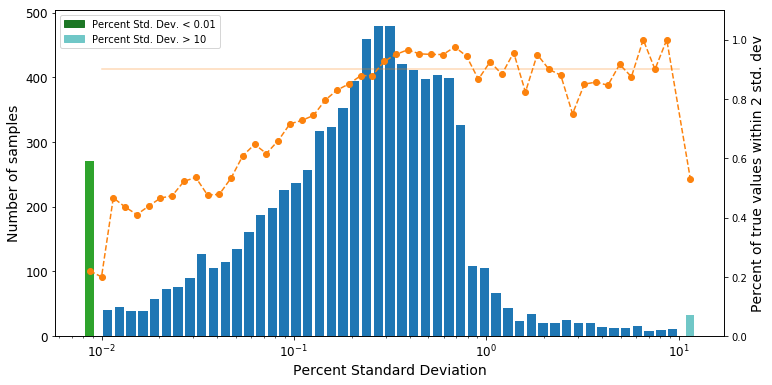

In [167]:
import matplotlib.patches as mpatches

def binning(results, bins):
    pctCounter = [[] for i in range(len(bins)+1)]
    bins = list(bins) + [np.inf]
    for res in results:
        k = 0
        while res[0] > bins[k]:
            k += 1
        pctCounter[k].append(res[1])
    return [np.mean(i) for i in pctCounter]

lowest = 0.01
highest = 10

fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(111)
bins = np.logspace(np.log10(lowest), np.log10(highest), 50)
ax1.hist([res[0] for res in results], bins=bins, rwidth=0.8)
ax1.set_xscale('log')

ax1.bar([bins[0]*bins[0]/bins[1]], [sum([1 for res in results if res[0]<lowest])], width=(bins[1]-bins[0])*0.6, color='#2EA32C')
ax1.bar([bins[-1]*bins[-1]/bins[-2]], [sum([1 for res in results if res[0]>highest])], width=(bins[-1]/bins[-2])*0.9, color='#70C7C7')

ax2 = ax1.twinx()
pct = binning(results, bins)
ax2.plot([bins[0]*bins[0]/bins[1]] + list(bins[:-1]) + [bins[-1]*bins[-1]/bins[-2]], pct, 'o--', color='#FC820D')
ax2.set_ylim([0, 1.1])
ax2.plot([0.01, 10], [0.9, 0.9], '#FC820D', alpha=0.3)

plot.set_ticks_size(ax1)
plot.set_ticks_size(ax2)
ax1.set_ylabel('Number of samples', fontsize=14)
ax1.set_xlabel('Percent Standard Deviation', fontsize=14)
ax2.set_ylabel('Percent of true values within 2 std. dev', fontsize=14)

handle = [mpatches.Patch(color='#1C7725', label='Percent Std. Dev. < 0.01'),
          mpatches.Patch(color='#70C7C7', label='Percent Std. Dev. > 10')]
ax1.legend(handles=handle, loc=2)

 
fig.savefig('/home/yuning/Work/ribozyme_pred/fig/ci_est/simuSet_2_method_2.png', dpi=300)
plt.show()

### Method 3

In [236]:
from importlib import reload
reload(k_seq.confidence_estimation)

simuSet = util.load_pickle('/mnt/storage/projects/ribozyme_predict/data/k_seq/fit_simu/simuSet_2.pkl')
for sample in simuSet:
    var, std = k_seq.confidence_estimation.method_3(sample)
    sample['estVar'] = var
    sample['estStd'] = std


simuSet_2.pkl:
800 simulated data from random configs with set detection times, 200 detected 4 times, 200 detected 3 times, 400 detected 2 times


/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


simuSet_2_full_method_3_res.pkl:
Estimation results from method 13 on simuSet_2_full
0.725


/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


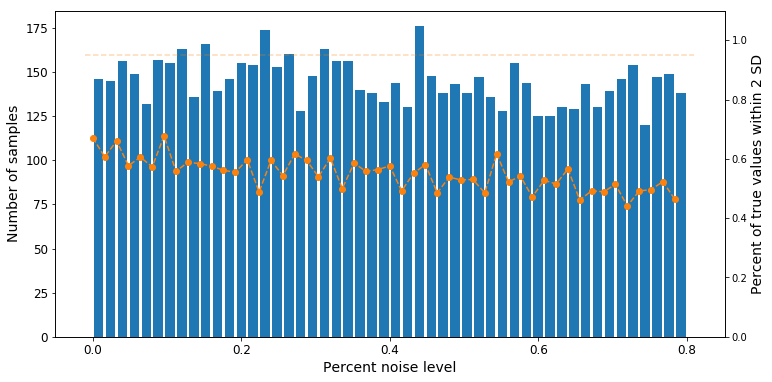

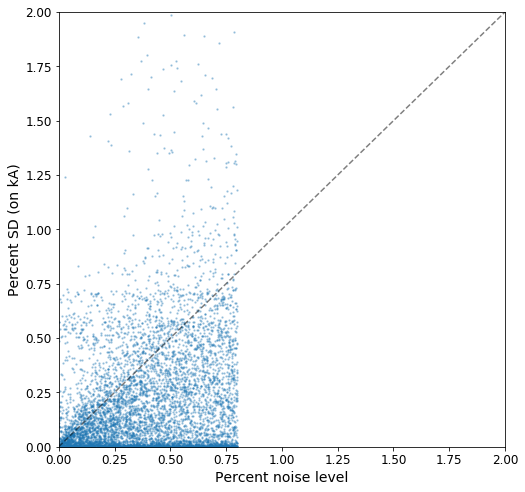

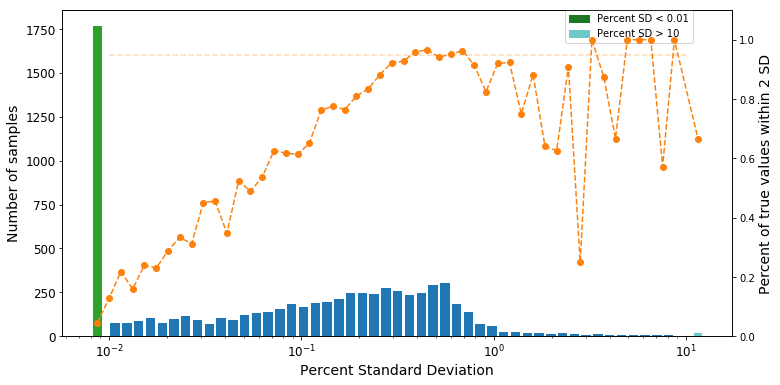

In [133]:
mtd = 3

import matplotlib.pyplot as plt
import plot
import matplotlib.patches as mpatches
import numpy as np

def results_survey(simuSet):
    def check(sample):
        if str(list(sample['config'])) == str([0, 0, 0, 0]):
            return 0
        elif np.isnan(sample['estStd'][2]) or np.isinf(sample['estStd'][2]):
            return 0
        else:
            return 1

    pctSuccess = sum([check(sample) for sample in simuSet])/ len(simuSet)
    results = [[sample['err'],
                sample['estStd'][2] / sample['estVar'][2],
                int(sample['estVar'][2] - 2 * sample['estStd'][2] < sample['kA'] < sample['estVar'][2] + 2 * sample['estStd'][2])]
                for sample in simuSet if check(sample)==1]
    return pctSuccess, results

simuSet = util.load_pickle('/mnt/storage/projects/k-seq/working/archive/fit_simu/simuSet_2_full_method_{}_res.pkl'.format(mtd))
pctSuccess, results = results_survey(simuSet)
print(pctSuccess)


def binning(results, ix, bins):
    pctCounter = [[] for i in range(len(bins)+1)]
    bins = list(bins) + [np.inf]
    for res in results:
        k = 0
        while res[ix] > bins[k]:
            k += 1
        pctCounter[k].append(res[-1])
    return [np.mean(i) for i in pctCounter]

lowest = 0
highest = 0.8

fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(111)
bins = np.linspace(lowest, highest, 51)
ax1.hist([res[0] for res in results], bins=bins, rwidth=0.8)

ax2 = ax1.twinx()
pct = binning(results, 0, bins)
ax2.plot([bins[0]*bins[0]/bins[1]] + list(bins[:-1]) + [bins[-1]*bins[-1]/bins[-2]], pct, 'o--', color='#FC820D')
ax2.set_ylim([0, 1.1])
ax2.plot([-0.01, 0.81], [0.95, 0.95], color='#FC820D', ls='--', alpha=0.3)

plot.set_ticks_size(ax1)
plot.set_ticks_size(ax2)
ax1.set_ylabel('Number of samples', fontsize=14)
ax1.set_xlabel('Percent noise level', fontsize=14)
ax2.set_ylabel('Percent of true values within 2 SD', fontsize=14)


fig.savefig('/mnt/chen-nas/Users/Yuning/figures/simuSet_2_method_{}_1.png'.format(mtd), dpi=300)
plt.show()

fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(111)
ax.scatter([sample['err'] for sample in simuSet], [sample['estStd'][2]/sample['estVar'][2] for sample in simuSet], s=2, alpha=0.3)
plot.set_ticks_size(ax)
ax.set_ylim([0, 2])
ax.set_xlim([0, 2])
ax.plot([0, 2], [0, 2], 'k--', alpha=0.5)
ax.set_xlabel('Percent noise level', fontsize=14)
ax.set_ylabel('Percent SD (on kA)', fontsize=14)
fig.savefig('/mnt/chen-nas/Users/Yuning/figures/simuSet_2_method_{}_2.png'.format(mtd), dpi=300)
plt.show()

lowest = 0.01
highest = 10

fig = plt.figure(figsize=[12,6])
## Plot histogram
ax1 = fig.add_subplot(111)
bins = np.logspace(np.log10(lowest), np.log10(highest), 50)
ax1.hist([res[1] for res in results], bins=bins, rwidth=0.8)
ax1.set_xscale('log')
## Add two extra bins
ax1.bar([bins[0]*bins[0]/bins[1]], [sum([1 for res in results if res[1] < lowest])], width=(bins[1]-bins[0])*0.6, color='#2EA32C')
ax1.bar([bins[-1]*bins[-1]/bins[-2]], [sum([1 for res in results if res[1] > highest])], width=(bins[-1]/bins[-2])*0.9, color='#70C7C7')

ax2 = ax1.twinx()
pct = binning(results, 1, bins)
ax2.plot([bins[0]*bins[0]/bins[1]] + list(bins[:-1]) + [bins[-1]*bins[-1]/bins[-2]], pct, 'o--', color='#FC820D')
ax2.set_ylim([0, 1.1])
ax2.plot([0.01, 10], [0.95, 0.95], color='#FC820D', ls='--', alpha=0.3)

plot.set_ticks_size(ax1)
plot.set_ticks_size(ax2)
ax1.set_ylabel('Number of samples', fontsize=14)
ax1.set_xlabel('Percent Standard Deviation', fontsize=14)
ax2.set_ylabel('Percent of true values within 2 SD', fontsize=14)

handle = [mpatches.Patch(color='#1C7725', label='Percent SD < 0.01'),
          mpatches.Patch(color='#70C7C7', label='Percent SD > 10')]
ax1.legend(handles=handle, loc=[0.75, 0.9])


fig.savefig('/mnt/chen-nas/Users/Yuning/figures/simuSet_2_method_{}.png'.format(mtd), dpi=300)
plt.show()



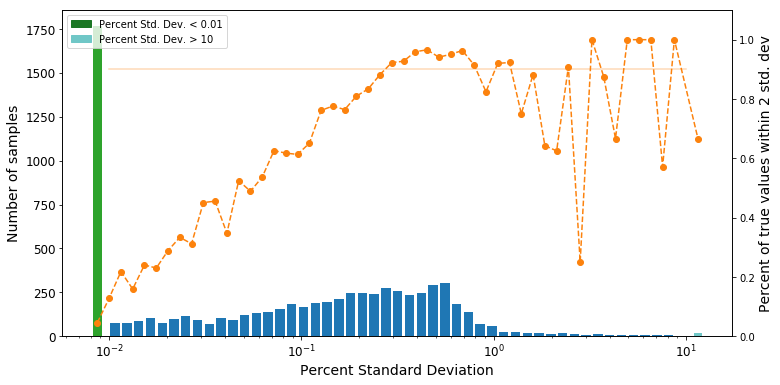

In [169]:
import matplotlib.patches as mpatches

def binning(results, bins):
    pctCounter = [[] for i in range(len(bins)+1)]
    bins = list(bins) + [np.inf]
    for res in results:
        k = 0
        while res[0] > bins[k]:
            k += 1
        pctCounter[k].append(res[1])
    return [np.mean(i) for i in pctCounter]

lowest = 0.01
highest = 10

fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(111)
bins = np.logspace(np.log10(lowest), np.log10(highest), 50)
ax1.hist([res[0] for res in results], bins=bins, rwidth=0.8)
ax1.set_xscale('log')

ax1.bar([bins[0]*bins[0]/bins[1]], [sum([1 for res in results if res[0]<lowest])], width=(bins[1]-bins[0])*0.6, color='#2EA32C')
ax1.bar([bins[-1]*bins[-1]/bins[-2]], [sum([1 for res in results if res[0]>highest])], width=(bins[-1]/bins[-2])*0.9, color='#70C7C7')

ax2 = ax1.twinx()
pct = binning(results, bins)
ax2.plot([bins[0]*bins[0]/bins[1]] + list(bins[:-1]) + [bins[-1]*bins[-1]/bins[-2]], pct, 'o--', color='#FC820D')
ax2.set_ylim([0, 1.1])
ax2.plot([0.01, 10], [0.9, 0.9], '#FC820D', alpha=0.3)

plot.set_ticks_size(ax1)
plot.set_ticks_size(ax2)
ax1.set_ylabel('Number of samples', fontsize=14)
ax1.set_xlabel('Percent Standard Deviation', fontsize=14)
ax2.set_ylabel('Percent of true values within 2 std. dev', fontsize=14)

handle = [mpatches.Patch(color='#1C7725', label='Percent Std. Dev. < 0.01'),
          mpatches.Patch(color='#70C7C7', label='Percent Std. Dev. > 10')]
ax1.legend(handles=handle, loc=2)

 
fig.savefig('/home/yuning/Work/ribozyme_pred/fig/ci_est/simuSet_2_method_3.png', dpi=300)
plt.show()

### Method 4

In [88]:
from importlib import reload
import util
import k_seq.confidence_estimation
reload(k_seq.confidence_estimation)

simuSet = util.load_pickle('/mnt/storage/projects/ribozyme_predict/data/k_seq/fit_simu/simuSet_2_full.pkl')
for sample in simuSet:
    var, std = k_seq.confidence_estimation.method_4(sample)
    sample['estVar'] = var
    sample['estStd'] = std
util.dump_pickle(data=simuSet,
                 dirc='/mnt/storage/projects/ribozyme_predict/data/k_seq/fit_simu/simuSet_2_full_method_4_res.pkl',
                 log='Estimation results from method 4 on simuSet 2',
                 overwrite=False)

simuSet_2_full.pkl:
10000 simulated data from random configs with set detection times, 2000 detected 4 times, 3000 detected 3 times, 5000 detected 2 times


/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


Data has been saved to /mnt/storage/projects/ribozyme_predict/data/k_seq/fit_simu/simuSet_2_full_method_4_res.pkl


IndexError: invalid index to scalar variable.

simuSet_2_full_method_4_res.pkl:
Estimation results from method 4 on simuSet 2
0.9745


/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


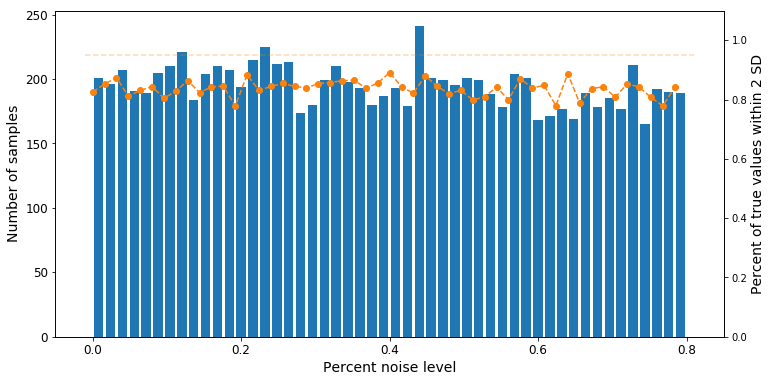

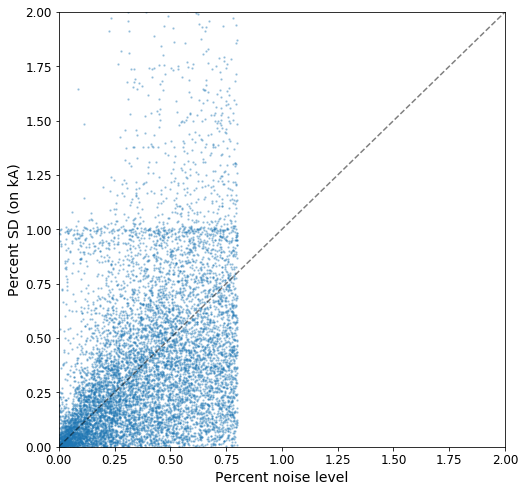

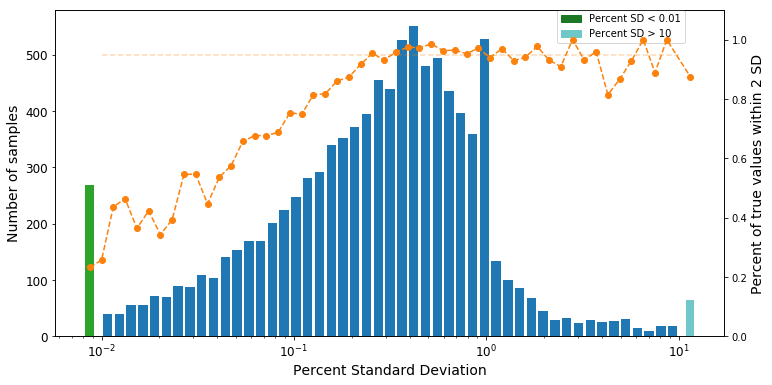

In [136]:
mtd = 4

import matplotlib.pyplot as plt
import plot
import matplotlib.patches as mpatches
import numpy as np
def check(sample):
    if str(list(sample['config'])) == str([0, 0, 0, 0]):
        return 0
    elif np.isnan(sample['estStd'][2]) or np.isinf(sample['estStd'][2]):
        return 0
    else:
        return 1
def results_survey(simuSet):
    

    pctSuccess = sum([check(sample) for sample in simuSet])/ len(simuSet)
    for sample in simuSet:
        sample['estStd'] = sample['estStd'] * np.sqrt(np.sum(sample['config']))
    results = [[sample['err'],
                sample['estStd'][2] / sample['estVar'][2],
                int(sample['estVar'][2] - 2 * sample['estStd'][2] < sample['kA'] < sample['estVar'][2] + 2 * sample['estStd'][2])]
                for sample in simuSet if check(sample)==1]
    return pctSuccess, results

simuSet = util.load_pickle('/mnt/storage/projects/k-seq/working/archive/fit_simu/simuSet_2_full_method_{}_res.pkl'.format(mtd))


pctSuccess, results = results_survey(simuSet)
print(pctSuccess)


def binning(results, ix, bins):
    pctCounter = [[] for i in range(len(bins)+1)]
    bins = list(bins) + [np.inf]
    for res in results:
        k = 0
        while res[ix] > bins[k]:
            k += 1
        pctCounter[k].append(res[-1])
    return [np.mean(i) for i in pctCounter]

lowest = 0
highest = 0.8

fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(111)
bins = np.linspace(lowest, highest, 51)
ax1.hist([res[0] for res in results], bins=bins, rwidth=0.8)

ax2 = ax1.twinx()
pct = binning(results, 0, bins)
ax2.plot([bins[0]*bins[0]/bins[1]] + list(bins[:-1]) + [bins[-1]*bins[-1]/bins[-2]], pct, 'o--', color='#FC820D')
ax2.set_ylim([0, 1.1])
ax2.plot([-0.01, 0.81], [0.95, 0.95], color='#FC820D', ls='--', alpha=0.3)

plot.set_ticks_size(ax1)
plot.set_ticks_size(ax2)
ax1.set_ylabel('Number of samples', fontsize=14)
ax1.set_xlabel('Percent noise level', fontsize=14)
ax2.set_ylabel('Percent of true values within 2 SD', fontsize=14)


fig.savefig('/mnt/chen-nas/Users/Yuning/figures/simuSet_2_method_{}_1.png'.format(mtd), dpi=300)
plt.show()

fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(111)
ax.scatter([sample['err'] for sample in simuSet if check(sample)==1], [sample['estStd'][2]/sample['estVar'][2] for sample in simuSet if check(sample)==1], s=2, alpha=0.3)
plot.set_ticks_size(ax)
ax.set_ylim([0, 2])
ax.set_xlim([0, 2])
ax.plot([0, 2], [0, 2], 'k--', alpha=0.5)
ax.set_xlabel('Percent noise level', fontsize=14)
ax.set_ylabel('Percent SD (on kA)', fontsize=14)
fig.savefig('/mnt/chen-nas/Users/Yuning/figures/simuSet_2_method_{}_2.png'.format(mtd), dpi=300)
plt.show()

lowest = 0.01
highest = 10

fig = plt.figure(figsize=[12,6])
## Plot histogram
ax1 = fig.add_subplot(111)
bins = np.logspace(np.log10(lowest), np.log10(highest), 50)
ax1.hist([res[1] for res in results], bins=bins, rwidth=0.8)
ax1.set_xscale('log')
## Add two extra bins
ax1.bar([bins[0]*bins[0]/bins[1]], [sum([1 for res in results if res[1] < lowest])], width=(bins[1]-bins[0])*0.6, color='#2EA32C')
ax1.bar([bins[-1]*bins[-1]/bins[-2]], [sum([1 for res in results if res[1] > highest])], width=(bins[-1]/bins[-2])*0.9, color='#70C7C7')

ax2 = ax1.twinx()
pct = binning(results, 1, bins)
ax2.plot([bins[0]*bins[0]/bins[1]] + list(bins[:-1]) + [bins[-1]*bins[-1]/bins[-2]], pct, 'o--', color='#FC820D')
ax2.set_ylim([0, 1.1])
ax2.plot([0.01, 10], [0.95, 0.95], color='#FC820D', ls='--', alpha=0.3)

plot.set_ticks_size(ax1)
plot.set_ticks_size(ax2)
ax1.set_ylabel('Number of samples', fontsize=14)
ax1.set_xlabel('Percent Standard Deviation', fontsize=14)
ax2.set_ylabel('Percent of true values within 2 SD', fontsize=14)

handle = [mpatches.Patch(color='#1C7725', label='Percent SD < 0.01'),
          mpatches.Patch(color='#70C7C7', label='Percent SD > 10')]
ax1.legend(handles=handle, loc=[0.75, 0.9])


fig.savefig('/mnt/chen-nas/Users/Yuning/figures/simuSet_2_method_{}.png'.format(mtd), dpi=300)
plt.show()



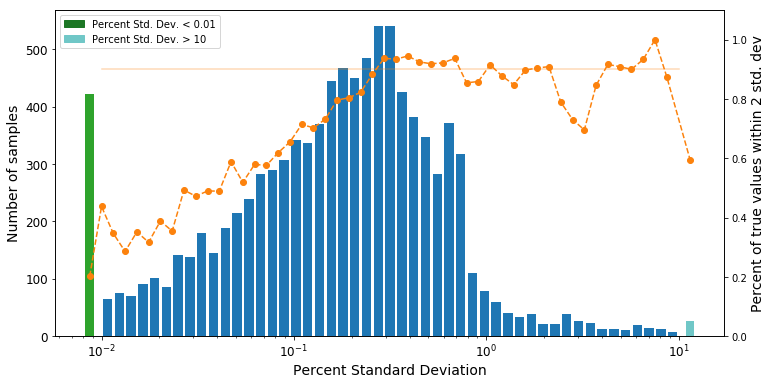

In [171]:
import matplotlib.patches as mpatches

def binning(results, bins):
    pctCounter = [[] for i in range(len(bins)+1)]
    bins = list(bins) + [np.inf]
    for res in results:
        k = 0
        while res[0] > bins[k]:
            k += 1
        pctCounter[k].append(res[1])
    return [np.mean(i) for i in pctCounter]

lowest = 0.01
highest = 10

fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(111)
bins = np.logspace(np.log10(lowest), np.log10(highest), 50)
ax1.hist([res[0] for res in results], bins=bins, rwidth=0.8)
ax1.set_xscale('log')

ax1.bar([bins[0]*bins[0]/bins[1]], [sum([1 for res in results if res[0]<lowest])], width=(bins[1]-bins[0])*0.6, color='#2EA32C')
ax1.bar([bins[-1]*bins[-1]/bins[-2]], [sum([1 for res in results if res[0]>highest])], width=(bins[-1]/bins[-2])*0.9, color='#70C7C7')

ax2 = ax1.twinx()
pct = binning(results, bins)
ax2.plot([bins[0]*bins[0]/bins[1]] + list(bins[:-1]) + [bins[-1]*bins[-1]/bins[-2]], pct, 'o--', color='#FC820D')
ax2.set_ylim([0, 1.1])
ax2.plot([0.01, 10], [0.9, 0.9], '#FC820D', alpha=0.3)

plot.set_ticks_size(ax1)
plot.set_ticks_size(ax2)
ax1.set_ylabel('Number of samples', fontsize=14)
ax1.set_xlabel('Percent Standard Deviation', fontsize=14)
ax2.set_ylabel('Percent of true values within 2 std. dev', fontsize=14)

handle = [mpatches.Patch(color='#1C7725', label='Percent Std. Dev. < 0.01'),
          mpatches.Patch(color='#70C7C7', label='Percent Std. Dev. > 10')]
ax1.legend(handles=handle, loc=2)

 
fig.savefig('/home/yuning/Work/ribozyme_pred/fig/ci_est/simuSet_2_method_4.png', dpi=300)
plt.show()

### Method 5

In [26]:
from importlib import reload
import util
import k_seq.confidence_estimation
reload(k_seq.confidence_estimation)

simuSet = util.load_pickle('/mnt/storage/projects/ribozyme_predict/data/k_seq/fit_simu/simuSet_2.pkl')
simuSet = k_seq.confidence_estimation.method_5_multi_main(simuSet)

simuSet_2.pkl:
800 simulated data from random configs with set detection times, 200 detected 4 times, 200 detected 3 times, 400 detected 2 times


/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarn

Process finished in 55 s


/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


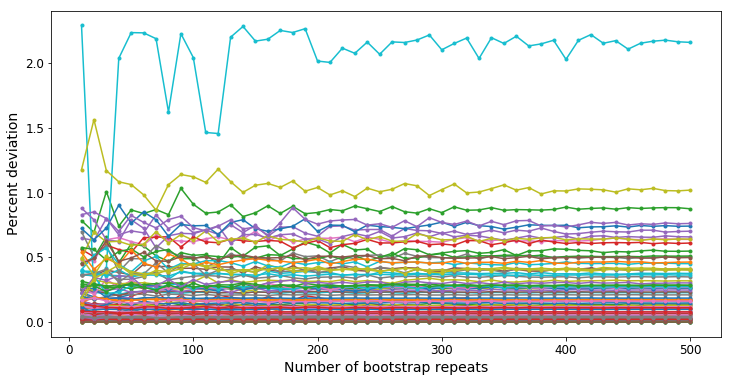

In [33]:
bsSizes = [(i+1)*10 for i in range(50)]
for sample in simuSet:
    if len(sample['estStd']) > 1:
        kAList = np.array(sample['estStd']).T[2]
        bsProfile = []
        for setSize in bsSizes:
            selected = np.random.choice(kAList, replace=False, size=setSize)
            bsProfile.append({
                'mean': np.mean(selected),
                'std': np.std(selected, ddof=1),
                'pct2.5': np.percentile(selected, 2.5),
                'pct97.5': np.percentile(selected, 97.5)
            })
        sample['bsProfile'] = bsProfile
    else:
        sample['bsProfile'] = [np.nan]

fig = plt.figure(figsize=[12,6])
ax = fig.add_subplot(111)
for sample in simuSet:
    if len(sample['bsProfile'])>1:
        ax.plot(bsSizes, [bs['std']/bs['mean'] for bs in sample['bsProfile']], '.-')
plot.set_ticks_size(ax)
ax.set_xlabel('Number of bootstrap repeats', fontsize=14)
ax.set_ylabel('Percent deviation', fontsize=14)
plt.show()

simuSet_2_full_method_5_parallel_res.pkl:
Estimation on Simuset_2_full: bootstrap residues for 500 times, parallelized


/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


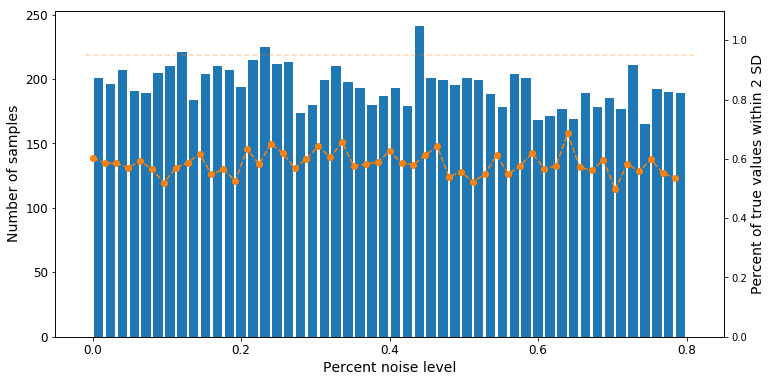

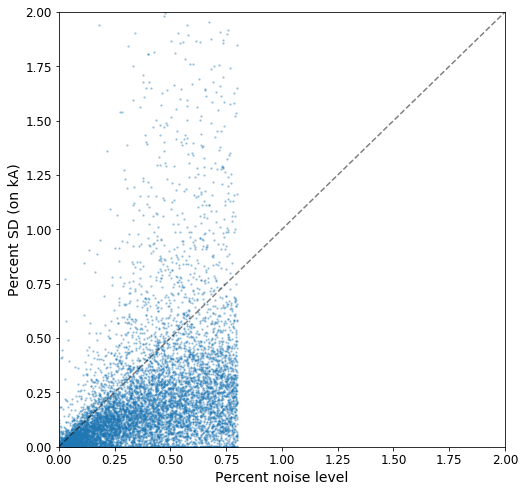

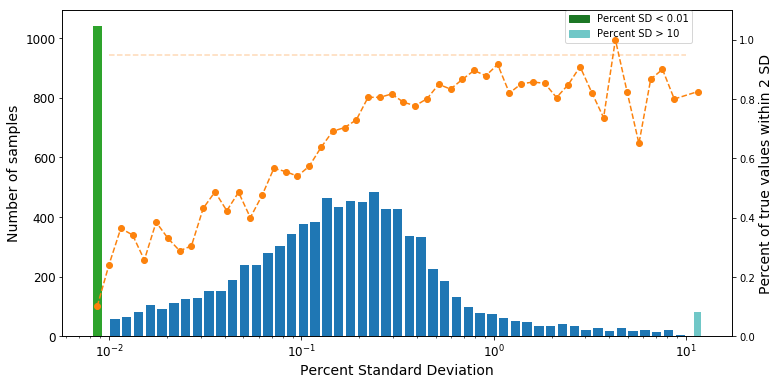

In [138]:
mtd = 5

import matplotlib.pyplot as plt
import plot
import matplotlib.patches as mpatches
import numpy as np

def results_survey(simuSet, percentile=False):
    pctSuccess = len([1 for sample in simuSet if len(sample['estStd']) != 1])/ len(simuSet)
    if percentile:
        results = [[sample['err'],
                    np.std(sample['estStd'], axis=0, ddof=1)[2] / sample['estVar'][2],
                    int(np.percentile(sample['estStd'], 2.5, axis=0)[2] < sample['kA'] < np.percentile(sample['estStd'], 97.5, axis=0)[2])]
                   for sample in simuSet if len(sample['estStd']) > 1]
    else:
        results = [[sample['err'],
                    np.std(sample['estStd'], axis=0, ddof=1)[2]/sample['estVar'][2],
                    int(sample['estVar'][2] - 2* np.std(sample['estStd'], axis=0, ddof=1)[2] < sample['kA'] < sample['estVar'][2] + 2* np.std(sample['estStd'], axis=0, ddof=1)[2])]
                   for sample in simuSet if len(sample['estStd']) > 1]
    return pctSuccess, results

simuSet = util.load_pickle('/mnt/storage/projects/k-seq/working/archive/fit_simu/simuSet_2_full_method_5_parallel_res.pkl')
pctSuccess, results = results_survey(simuSet, percentile=True)

def binning(results, ix, bins):
    pctCounter = [[] for i in range(len(bins)+1)]
    bins = list(bins) + [np.inf]
    for res in results:
        k = 0
        while res[ix] > bins[k]:
            k += 1
        pctCounter[k].append(res[-1])
    return [np.mean(i) for i in pctCounter]

lowest = 0
highest = 0.8

fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(111)
bins = np.linspace(lowest, highest, 51)
ax1.hist([res[0] for res in results], bins=bins, rwidth=0.8)

ax2 = ax1.twinx()
pct = binning(results, 0, bins)
ax2.plot([bins[0]*bins[0]/bins[1]] + list(bins[:-1]) + [bins[-1]*bins[-1]/bins[-2]], pct, 'o--', color='#FC820D')
ax2.set_ylim([0, 1.1])
ax2.plot([-0.01, 0.81], [0.95, 0.95], color='#FC820D', ls='--', alpha=0.3)

plot.set_ticks_size(ax1)
plot.set_ticks_size(ax2)
ax1.set_ylabel('Number of samples', fontsize=14)
ax1.set_xlabel('Percent noise level', fontsize=14)
ax2.set_ylabel('Percent of true values within 2 SD', fontsize=14)
fig.savefig('/mnt/chen-nas/Users/Yuning/figures/simuSet_2_method_{}_1_p.png'.format(mtd), dpi=300)
plt.show()

fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(111)
ax.scatter([sample[0] for sample in results], [sample[1] for sample in results], s=2, alpha=0.3)
plot.set_ticks_size(ax)
ax.set_ylim([0, 2])
ax.set_xlim([0, 2])
ax.plot([0, 2], [0, 2], 'k--', alpha=0.5)
ax.set_xlabel('Percent noise level', fontsize=14)
ax.set_ylabel('Percent SD (on kA)', fontsize=14)
fig.savefig('/mnt/chen-nas/Users/Yuning/figures/simuSet_2_method_{}_2_p.png'.format(mtd), dpi=300)
plt.show()

lowest = 0.01
highest = 10

fig = plt.figure(figsize=[12,6])
## Plot histogram
ax1 = fig.add_subplot(111)
bins = np.logspace(np.log10(lowest), np.log10(highest), 50)
ax1.hist([res[1] for res in results], bins=bins, rwidth=0.8)
ax1.set_xscale('log')
## Add two extra bins
ax1.bar([bins[0]*bins[0]/bins[1]], [sum([1 for res in results if res[1] < lowest])], width=(bins[1]-bins[0])*0.6, color='#2EA32C')
ax1.bar([bins[-1]*bins[-1]/bins[-2]], [sum([1 for res in results if res[1] > highest])], width=(bins[-1]/bins[-2])*0.9, color='#70C7C7')

ax2 = ax1.twinx()
pct = binning(results, 1, bins)
ax2.plot([bins[0]*bins[0]/bins[1]] + list(bins[:-1]) + [bins[-1]*bins[-1]/bins[-2]], pct, 'o--', color='#FC820D')
ax2.set_ylim([0, 1.1])
ax2.plot([0.01, 10], [0.95, 0.95], color='#FC820D', ls='--', alpha=0.3)

plot.set_ticks_size(ax1)
plot.set_ticks_size(ax2)
ax1.set_ylabel('Number of samples', fontsize=14)
ax1.set_xlabel('Percent Standard Deviation', fontsize=14)
ax2.set_ylabel('Percent of true values within 2 SD', fontsize=14)

handle = [mpatches.Patch(color='#1C7725', label='Percent SD < 0.01'),
          mpatches.Patch(color='#70C7C7', label='Percent SD > 10')]
ax1.legend(handles=handle, loc=[0.75, 0.9])


fig.savefig('/mnt/chen-nas/Users/Yuning/figures/simuSet_2_method_{}_p.png'.format(mtd), dpi=300)
plt.show()

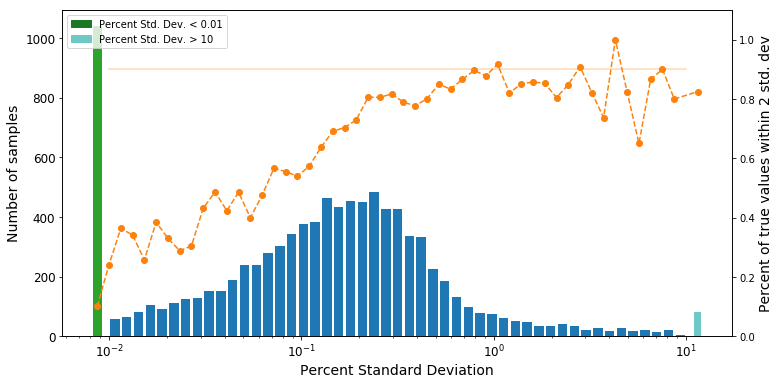

In [17]:
import matplotlib.patches as mpatches

def binning(results, bins):
    pctCounter = [[] for i in range(len(bins)+1)]
    bins = list(bins) + [np.inf]
    for res in results:
        k = 0
        while res[0] > bins[k]:
            k += 1
        pctCounter[k].append(res[1])
    return [np.mean(i) for i in pctCounter]

lowest = 0.01
highest = 10

fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(111)
bins = np.logspace(np.log10(lowest), np.log10(highest), 50)
ax1.hist([res[0] for res in results], bins=bins, rwidth=0.8)
ax1.set_xscale('log')

ax1.bar([bins[0]*bins[0]/bins[1]], [sum([1 for res in results if res[0]<lowest])], width=(bins[1]-bins[0])*0.6, color='#2EA32C')
ax1.bar([bins[-1]*bins[-1]/bins[-2]], [sum([1 for res in results if res[0]>highest])], width=(bins[-1]/bins[-2])*0.9, color='#70C7C7')

ax2 = ax1.twinx()
pct = binning(results, bins)
ax2.plot([bins[0]*bins[0]/bins[1]] + list(bins[:-1]) + [bins[-1]*bins[-1]/bins[-2]], pct, 'o--', color='#FC820D')
ax2.set_ylim([0, 1.1])
ax2.plot([0.01, 10], [0.9, 0.9], '#FC820D', alpha=0.3)

plot.set_ticks_size(ax1)
plot.set_ticks_size(ax2)
ax1.set_ylabel('Number of samples', fontsize=14)
ax1.set_xlabel('Percent Standard Deviation', fontsize=14)
ax2.set_ylabel('Percent of true values within 2 std. dev', fontsize=14)

handle = [mpatches.Patch(color='#1C7725', label='Percent Std. Dev. < 0.01'),
          mpatches.Patch(color='#70C7C7', label='Percent Std. Dev. > 10')]
ax1.legend(handles=handle, loc=2)

 
fig.savefig('/home/yuning/Work/ribozyme_pred/fig/ci_est/simuSet_2_method_5.png', dpi=300)
plt.show()

### Cross comparison

In [210]:
simuSet = util.load_pickle('/mnt/storage/projects/ribozyme_predict/data/k_seq/fit_simu/simuSet_1_method_1_res.pkl')
for sample in simuSet:
    if str(list(sample['config'])) == str([0, 0, 0, 0]):
        sample['mtd1'] = [np.nan, np.nan, np.nan]
    else:
        sample['mtd1'] = np.array(sample['estStd'])/np.array(sample['estVar'])
simuSet2 = util.load_pickle('/mnt/storage/projects/ribozyme_predict/data/k_seq/fit_simu/simuSet_1_method_2_res.pkl')
for ix, sample in enumerate(simuSet):
    if str(sample['config']) != str(simuSet2[ix]['config']):
        print('Data not aligned in Method 2')
        print(sample['estVar'])
        print(simuSet2[ix]['estVar'])
    if str(list(simuSet2[ix]['config'])) == str([0, 0, 0, 0]):
        sample['mtd2'] = [np.nan, np.nan, np.nan]
    else:
        sample['mtd2'] = np.array(simuSet2[ix]['estStd'])/np.array(simuSet2[ix]['estVar'])
simuSet2 = util.load_pickle('/mnt/storage/projects/ribozyme_predict/data/k_seq/fit_simu/simuSet_1_method_3_res.pkl')
for ix, sample in enumerate(simuSet):
    if str(sample['config']) != str(simuSet2[ix]['config']):
        print('Data not aligned in Method 3')
    if str(list(simuSet2[ix]['config'])) == str([0, 0, 0, 0]):
        sample['mtd3'] = [np.nan, np.nan, np.nan]
    else:
        sample['mtd3'] = np.array(simuSet2[ix]['estStd'])/np.array(simuSet2[ix]['estVar'])
simuSet2 = util.load_pickle('/mnt/storage/projects/ribozyme_predict/data/k_seq/fit_simu/simuSet_1_method_4_res.pkl')
for ix, sample in enumerate(simuSet):
    if str(sample['config']) != str(simuSet2[ix]['config']):
        print('Data not aligned in Method 4')
    if str(list(simuSet2[ix]['config'])) == str([0, 0, 0, 0]):
        sample['mtd4'] = [np.nan, np.nan, np.nan]
    else:
        sample['mtd4'] = np.array(simuSet2[ix]['estStd'])/np.array(simuSet2[ix]['estVar'])
simuSet2 = util.load_pickle('/mnt/storage/projects/ribozyme_predict/data/k_seq/fit_simu/simuSet_1_method_4_parallel_res.pkl')
for ix, sample in enumerate(simuSet):
    if str(sample['config']) != str(simuSet2[ix]['config']):
        print('Data not aligned in Method 5')
    sample['mtd5All'] = simuSet2[ix]['estStd']
    if len(simuSet2[ix]['estStd']) > 1:
        sample['mtd5'] = np.std(simuSet2[ix]['estStd'], axis=0, ddof=1)/np.array(simuSet2[ix]['estVar'])
    else:
        sample['mtd5'] = [np.nan, np.nan, np.nan]

simuSet_1_method_1_res.pkl:
10000 simulated data on [3,3,3,3] using method 1: simply from pcov in curve_fit
simuSet_1_method_2_res.pkl:
10000 simulated data on [3,3,3,3] using method 2: calculated from 3 manually selected series
simuSet_1_method_3_res.pkl:
10000 simulated data on [3,3,3,3] using method 3: calculated from 3 randomly selected series
simuSet_1_method_4_res.pkl:
10000 simulated data on [3,3,3,3] using method 4: jackknife 1-delete
simuSet_1_method_4_parallel_res.pkl:
10000 simulated data on [3,3,3,3] using method 5: bootstrap residues for 500 times, parallelized


In [227]:
simuSet = util.load_pickle('/mnt/storage/projects/ribozyme_predict/data/k_seq/fit_simu/simuSet_2_full_method_5_parallel_res.pkl')

simuSet_2_full_method_5_parallel_res.pkl:
Estimation on Simuset_2_full: bootstrap residues for 500 times, parallelized


In [219]:
stdScatter = np.array([[sample['mtd%i'%ix][2] for ix in [1, 2, 3, 4, 5]] for sample in simuSet]).T

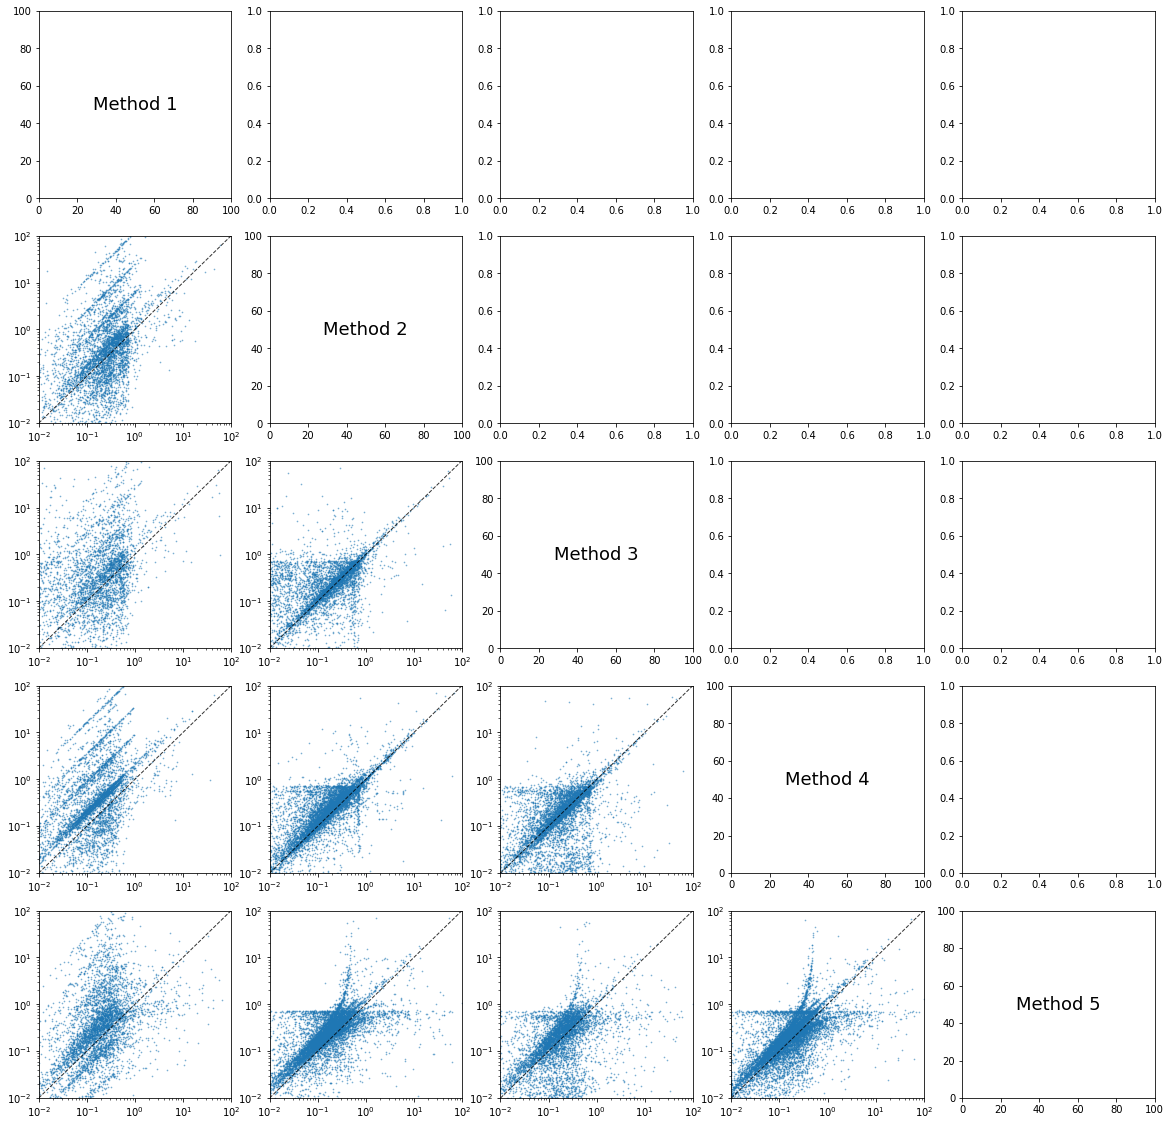

In [221]:
fig,axes = plt.subplots(5, 5, figsize=[20, 20])
for i in range(5):
    for j in range(i+1):
        ax = axes[i,j]
        if i!=j:
            ax.scatter(stdScatter[i], stdScatter[j], s=0.5, alpha=0.5)
            ax.plot([0.01, 100], [0.01, 100], 'k--', lw=1, alpha=0.8)
            ax.set_xscale('log')
            ax.set_yscale('log')
        else:
            ax.text(s = 'Method %i' %(i+1), x=50, y=50, ha='center', va='center', fontsize=18)
        ax.set_xlim([0.01, 100])
        ax.set_ylim([0.01, 100])
        
fig.savefig('/home/yuning/Work/ribozyme_pred/fig/ci_est/simuSet_2_method_ALL.png', dpi=300)
plt.show()

### Correlation with number of detected times

In [228]:
results = [[np.sum(sample['config']),
            int(len(sample['estStd']) > 1),
            np.std(sample['estStd'], axis=0, ddof=1)[2]/sample['estVar'][2],
            int(np.percentile(sample['estStd'], 2.5, axis=0)[2] < sample['kA'] < np.percentile(sample['estStd'], 97.5, axis=0)[2])] if len(sample['estStd']) > 1
            else [np.sum(sample['config']), int(len(sample['estStd']) > 1), np.nan, np.nan]
            for sample in simuSet]

/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


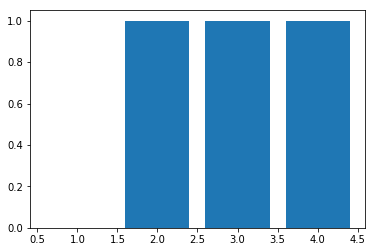

In [230]:
plt.figure()
plt.bar([1,2,3,4], [np.mean([res[1] for res in results if res[0]==detectedNum]) for detectedNum in [1,2,3,4]])
plt.show()

/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


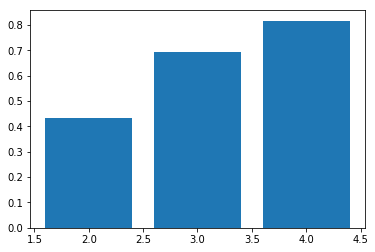

In [231]:
plt.figure()
plt.bar([1,2,3,4], [np.mean([res[3] for res in results if (res[0]==detectedNum)and(res[1]==1)]) for detectedNum in [1,2,3,4]])
plt.show()

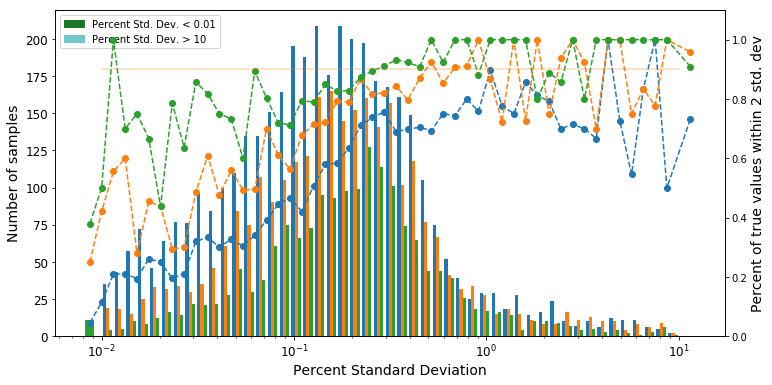

In [235]:
import matplotlib.patches as mpatches

def binning(results, bins):
    pctCounter = [[] for i in range(len(bins)+1)]
    bins = list(bins) + [np.inf]
    for res in results:
        k = 0
        while res[0] > bins[k]:
            k += 1
        pctCounter[k].append(res[1])
    return [np.mean(i) for i in pctCounter]

lowest = 0.01
highest = 10

fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(111)
bins = np.logspace(np.log10(lowest), np.log10(highest), 50)
ax1.hist([[res[2] for res in results if (res[0]==detectedNum)and(res[1] == 1)] for detectedNum in [2, 3, 4]], bins=bins, rwidth=0.8)
ax1.set_xscale('log')

ax1.bar([bins[0]*bins[0]/bins[1]], [sum([1 for res in results if res[0]<lowest])], width=(bins[1]-bins[0])*0.6, color='#2EA32C')
ax1.bar([bins[-1]*bins[-1]/bins[-2]], [sum([1 for res in results if res[0]>highest])], width=(bins[-1]/bins[-2])*0.9, color='#70C7C7')

ax2 = ax1.twinx()
for detectedNum in [2,3,4]:
    pct = binning([[res[2], res[3]] for res in results if res[0]==detectedNum], bins)
    ax2.plot([bins[0]*bins[0]/bins[1]] + list(bins[:-1]) + [bins[-1]*bins[-1]/bins[-2]], pct, 'o--')
ax2.set_ylim([0, 1.1])
ax2.plot([0.01, 10], [0.9, 0.9], '#FC820D', alpha=0.3)

plot.set_ticks_size(ax1)
plot.set_ticks_size(ax2)
ax1.set_ylabel('Number of samples', fontsize=14)
ax1.set_xlabel('Percent Standard Deviation', fontsize=14)
ax2.set_ylabel('Percent of true values within 2 std. dev', fontsize=14)

handle = [mpatches.Patch(color='#1C7725', label='Percent Std. Dev. < 0.01'),
          mpatches.Patch(color='#70C7C7', label='Percent Std. Dev. > 10')]
ax1.legend(handles=handle, loc=2)

 
# fig.savefig('/home/yuning/Work/ribozyme_pred/fig/ci_est/simuSet_2_method_5.png', dpi=300)
plt.show()

## Test on different number of data points

In [4]:
simuSet = util.load_pickle('/mnt/storage/projects/ribozyme_predict/data/k_seq/fit_simu/simuSet_3_full_method_5_parallel_res.pkl')

simuSet_3_full_method_5_parallel_res.pkl:
Estimation on Simuset_3_full: bootstrap residues for 500 times, parallelized


In [5]:
import numpy as np
results = [[np.sum(sample['config']),
            int(len(sample['estStd']) > 1),
            np.std(sample['estStd'], axis=0, ddof=1)[2]/sample['estVar'][2],
            int(np.percentile(sample['estStd'], 2.5, axis=0)[2] < sample['kA'] < np.percentile(sample['estStd'], 97.5, axis=0)[2])] if len(sample['estStd']) > 1
            else [np.sum(sample['config']), int(len(sample['estStd']) > 1), np.nan, np.nan]
            for sample in simuSet]

/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


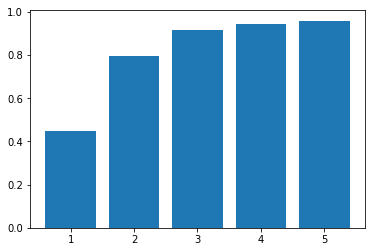

In [8]:
import matplotlib.pyplot as plt
plt.figure()
plt.bar([1,2,3,4,5], [np.mean([res[3] for res in results if (res[0]==detectedNum)and(res[1]==1)]) for detectedNum in [2,4,6,8,10]])
plt.show()

/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


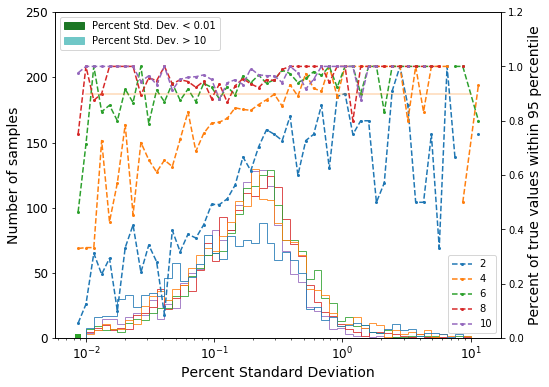

In [26]:
import matplotlib.patches as mpatches
import plot

def binning(results, bins):
    pctCounter = [[] for i in range(len(bins)+1)]
    bins = list(bins) + [np.inf]
    for res in results:
        k = 0
        while res[0] > bins[k]:
            k += 1
        pctCounter[k].append(res[1])
    return [np.mean(i) for i in pctCounter]

lowest = 0.01
highest = 10

fig = plt.figure(figsize=[8,6])
ax1 = fig.add_subplot(111)
bins = np.logspace(np.log10(lowest), np.log10(highest), 50)
ax1.hist([[res[2] for res in results if (res[0]==detectedNum)and(res[1] == 1)] for detectedNum in [2, 4, 6, 8, 10]], bins=bins, rwidth=0.8, histtype='step', alpha=0.8)
ax1.set_xscale('log')

ax1.bar([bins[0]*bins[0]/bins[1]], [sum([1 for res in results if res[0]<lowest])], width=(bins[1]-bins[0])*0.6, color='#2EA32C')
ax1.bar([bins[-1]*bins[-1]/bins[-2]], [sum([1 for res in results if res[0]>highest])], width=(bins[-1]/bins[-2])*0.9, color='#70C7C7')
ax1.set_ylim([0, 250])

ax2 = ax1.twinx()
for detectedNum in [2, 4, 6, 8, 10]:
    pct = binning([[res[2], res[3]] for res in results if res[0]==detectedNum], bins)
    ax2.plot([bins[0]*bins[0]/bins[1]] + list(bins[:-1]) + [bins[-1]*bins[-1]/bins[-2]], pct, 'o--', markersize=2, label=detectedNum)
ax2.set_ylim([0, 1.2])
ax2.plot([0.01, 10], [0.9, 0.9], '#FC820D', alpha=0.3)

plot.set_ticks_size(ax1)
plot.set_ticks_size(ax2)
ax1.set_ylabel('Number of samples', fontsize=14)
ax1.set_xlabel('Percent Standard Deviation', fontsize=14)
ax2.set_ylabel('Percent of true values within 95 percentile', fontsize=14)

handle = [mpatches.Patch(color='#1C7725', label='Percent Std. Dev. < 0.01'),
          mpatches.Patch(color='#70C7C7', label='Percent Std. Dev. > 10')]
ax1.legend(handles=handle, loc=2)
ax2.legend()
 
fig.savefig('/home/yuning/Work/ribozyme_pred/fig/ci_est/simuSet_3_method_5_detectedNum.png', dpi=300)
plt.show()

# Results on BTO data